## Case Study - Discounts for close to expiration products (Pink Labels)
Carlos Silva | Maria João Fernandes | Mariana Gabriel | Marina Azevedo | Renato Flores
<a id='toc'></a>


### Indice
* [1. Importar as bibliotecas e o dataset](#importar)<br>
    * [1.1. Importar as bibliotecas](#lib)<br>
    * [1.2. Importar e integrar os dados](#data)<br>
* [2. Análise Exploratória dos dados](#EDA) <br>
    * [2.1. Exploração Básica](#basica)<br>
    * [2.2. Exploração Estatística](#statist)<br>
       * [2.2.1. Variáveis Numéricas](#num)<br>
       * [2.2.2. Variáveis Categóricas](#cat)<br>
    * [2.3. Exploração Visual](#visual)<br>
       * [2.3.1. Variáveis Numéricas](#num3)<br>
          * [2.3.1.1 Analise e Tratamento dos Outliers](#out)<br>
     * [2.4. Análise Detalhada](#det)<br>
       * [2.3.2. Variáveis Categóricas](#cat3)<br>
* [3. Pré-processamento de dados](#preprocessing) <br>
    * [3.1. Limpeza de Dados](#dados)<br>
        * [3.1.1. Missing Values](#values)<br>   
          * [3.1.1.1. Tratamento Missing Values da variável oldpvp](#oldpvp)<br>
          * [3.1.1.2. Tratamento Missing Values da variável weight](#weight)<br>
          * [3.1.1.3. Tratamento Missing Values da variável sell-date](sell)<br>
          * [3.1.1.4. Tratamento Missing Values da variável selling_square_ft](selling)<br>
          * [3.1.1.5. Tratamento Missing Values da variável discount](discount)<br>
          * [3.1.1.6. Tratamento Missing Values da variável new_pvp](new_pvp)<br>
    * [3.2. Criação de Variáveis Dummies](#dummies)<br>
* [4. Exportar ficheiro csv](#cvs) <br>




O case study analisado em seguida provem da necessidade levantada por parte de um cliente de compreender a forma mais eficiente para minimizar perdas e aumentar a conversão de produtos próximos da data de validade (produtos com etiquetas rosas). Desta forma, o objetivo principal desta analise é desenvolver um estudo que permita maximizar o lucro obtido nas vendas dos produtos, evitando de igual forma o desperdício financeiro para a empresa, apresentando, assim, uma solução viável ao cliente para a rentabilidade do negócio.

Neste fase inicial do projeto, irão ser aplicadas técnicas de exploração de dados e pré-processamentos de dados para explorar o dataset fornecido pelo cliente e identificar os dados relevantes para o objetivo principal do projeto.

O dataset contém informações detalhadas sobre os produtos vendidos pelo cliente, incluindo preço original do produto e preço final, quantidades de etiquetas aplicadas, data de expiração, descontos aplicados, data em que o produto recebeu a etiqueta rosa adesão, data em que o produto foi vendido, lucro por unidade e margem, marcas dos produtos, indicador de venda e informações das lojas (id, área, localidade e tipo).

Desta forma, os objetivos desta analise exploratória de dados será:

- Explorar e compreender o dataset fornecido pelo cliente;
- Analisar e compreender os padrões de seleção dos clientes;
- Identificarr oportunidades de otimização e gerar insights relevantes;

<div class="alert alert-block" style="background-color:#AEC6CF; border: 1px solid #003366">
<a id='importar'>
<font color = '#003366'> 
    
# 1. Importar as bibliotecas e o dataset</font>
</a>
    
</div>

<div style="background-color: '#006400'; padding: 15px; border: 1px solid #003366";">
    <a id='lib'></a>
    <h2 style="color: #003366; margin: 0;">1.1. Importar as bibliotecas</h2>
</div>


In [6]:
import warnings
warnings.filterwarnings('ignore')  # para ignorar os avisos

#Importar as bibliotecas necessárias
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.impute import KNNImputer
from datetime import datetime
from sklearn.cluster import KMeans
from sklearn.metrics.pairwise import euclidean_distances
from IPython.display import display
from rich import print

<div style="background-color: '#006400'; padding: 15px; border: 1px solid #003366";">
    <a id='data'></a>
    <h2 style="color: #003366; margin: 0;">1.2. Importar e integrar os dados</h2>
</div>


In [8]:
#MJ: LTP EDIT Practical Case\2024 EDIT LTP__PraticalCase\LTP_PraticalCase Dataset\Data_labels.csv
#Mariana: Data_labels.csv
#Carlos:
#Marina:C:\Users\Marina Azevedo\Desktop\DataScienceBusinessAnalytics\10. Applied Practice\2024 EDIT LTP__PraticalCase\LTP_PraticalCase Dataset\Data_labels.csv
#Renato:

#Dados das labels
labels = pd.read_csv(r"Data_labels.csv")
labels

,idstore,sku,brand,oldpvp,new_pvp (discount),labelqty,weight (g),Payment_method,Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold
0,1,1,Marca 1,4.22,2.11 (0.50),1,260,Card,16,0.3376,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0
1,1,1,Marca 1,3.96,1.98 (0.50),1,260,,16,0.3168,0.005025,02/10/2021,2021-10-01,NaN,0.0
2,1,1,Marca 1,4.74,2.37 (0.50),1,260,Cash,16,0.3792,0.010050,03/10/2021,2021-10-01,2021-10-03,1.0
3,1,1,Marca 1,4.2,2.1 (0.50),1,260,Card,16,0.3360,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0
4,1,1,Marca 1,4.62,2.31 (0.50),1,260,Cash,16,0.3696,0.010050,03/10/2021,2021-10-01,2021-10-03,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150049,193,318,Marca 2,2.49,1.24 (0.50),1,97,,11,0.1364,0.100629,19-10-2021,2021-10-03,NaN,0.0
150050,203,318,Marca2,2.49,1.24 (0.50),1,97,Cash,11,0.1364,0.113208,19-10-2021,2021-10-01,2021-10-02,1.0
150051,203,318,Marca2,2.49,1.24 (0.50),1,97,Cash,11,0.1364,0.113208,19-10-2021,2021-10-01,2021-10-02,1.0
150052,139,319,Marca 24,3.49,2.44 (0.30),1,141,Cash,19,0.4636,0.092437,17/10/2021,2021-10-06,2021-10-11,1.0


In [9]:
#Verificar as dimensões do array 
labels.shape

(150054, 15)

In [10]:
#Dados das stores
store = pd.read_excel(r"Data_store.xlsx")
store.head()

,idstore,type,selling_square_ft,district
0,1,Large,4762.0,Évora
1,2,Large,12358.0,Bragança
2,3,Large,16159.0,Lisboa
3,4,Large,17903.0,Porto
4,5,Large,16179.0,Coimbra


**Conclusões:**

Ao analisar-se as duas tabelas, verifica-se que a coluna "idstore" é o stamp de ligação entre os dois datasets.

Desta forma, de modo a uniformizar os dados num só dataset e a facilitar a análise dos dados, será utilizada a coluna "idstore" para relacionar os datasets.

In [12]:
#Unir os dois datasets a partir da coluna "idstore"
df = labels.merge(store, on = 'idstore')
df.head()

,idstore,sku,brand,oldpvp,new_pvp (discount),labelqty,weight (g),Payment_method,Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district
0,1,1,Marca 1,4.22,2.11 (0.50),1,260,Card,16,0.3376,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora
1,1,1,Marca 1,3.96,1.98 (0.50),1,260,,16,0.3168,0.005025,02/10/2021,2021-10-01,NaN,0.0,Large,4762.0,Évora
2,1,1,Marca 1,4.74,2.37 (0.50),1,260,Cash,16,0.3792,0.010050,03/10/2021,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora
3,1,1,Marca 1,4.2,2.1 (0.50),1,260,Card,16,0.3360,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora
4,1,1,Marca 1,4.62,2.31 (0.50),1,260,Cash,16,0.3696,0.010050,03/10/2021,2021-10-01,2021-10-03,NaN,Large,4762.0,Évora


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150054 entries, 0 to 150053
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   idstore             150054 non-null  int64  
 1   sku                 150054 non-null  int64  
 2   brand               150054 non-null  object 
 3   oldpvp              150032 non-null  object 
 4   new_pvp (discount)  150026 non-null  object 
 5   labelqty            150054 non-null  int64  
 6   weight (g)          150050 non-null  object 
 7   Payment_method      150054 non-null  object 
 8   Margin (%)          150054 non-null  int64  
 9   Profit (€)          150054 non-null  float64
 10  perc_expiring_sku   149929 non-null  float64
 11  expiring_date       150054 non-null  object 
 12  labelling_date      150054 non-null  object 
 13  sell_date           80511 non-null   object 
 14  sold                149940 non-null  float64
 15  type                150054 non-nul

**Conclusões:**

Após uma primeira análise, verificou-se que o dataset é composto por:
- 8 Variáveis numéricas (4 - float64 & 4 - int64). 
- 4 Variavéis categóricas - "Brand", "Payment_method", "type", "district"
- A variável "Sold" é booleana (variável target), com missing values
- 3 variáveis temporais ( expiring_date; labelling_date; sell_date)

*Próximos passos:*
- Limpeza do dataset;
- Ajuste dos Dtypes para melhor utilização das variáveis;
- Desconsideração das variáveis idstore e sku como numéricas uma vez que permitem a identificação da loja e produto.

<div class="alert alert-block" style="background-color:#AEC6CF; border: 1px solid #003366">
<a id='EDA'>
<font color = '#003366'> 
    
# 2. Análise Exploratória dos dados</font>
</a>
    
</div>

<div style="background-color: '#006400'; padding: 15px; border: 1px solid #003366";">
    <a id='basica'></a>
    <h2 style="color: #003366; margin: 0;">2.1. Exploração Básica</h2>
</div>

In [17]:
df

,idstore,sku,brand,oldpvp,new_pvp (discount),labelqty,weight (g),Payment_method,Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district
0,1,1,Marca 1,4.22,2.11 (0.50),1,260,Card,16,0.3376,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora
1,1,1,Marca 1,3.96,1.98 (0.50),1,260,,16,0.3168,0.005025,02/10/2021,2021-10-01,NaN,0.0,Large,4762.0,Évora
2,1,1,Marca 1,4.74,2.37 (0.50),1,260,Cash,16,0.3792,0.010050,03/10/2021,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora
3,1,1,Marca 1,4.2,2.1 (0.50),1,260,Card,16,0.3360,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora
4,1,1,Marca 1,4.62,2.31 (0.50),1,260,Cash,16,0.3696,0.010050,03/10/2021,2021-10-01,2021-10-03,NaN,Large,4762.0,Évora
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150049,193,318,Marca 2,2.49,1.24 (0.50),1,97,,11,0.1364,0.100629,19-10-2021,2021-10-03,NaN,0.0,Medium,5048.0,Viseu
150050,203,318,Marca2,2.49,1.24 (0.50),1,97,Cash,11,0.1364,0.113208,19-10-2021,2021-10-01,2021-10-02,1.0,Medium,9370.0,Faro
150051,203,318,Marca2,2.49,1.24 (0.50),1,97,Cash,11,0.1364,0.113208,19-10-2021,2021-10-01,2021-10-02,1.0,Medium,9370.0,Faro
150052,139,319,Marca 24,3.49,2.44 (0.30),1,141,Cash,19,0.4636,0.092437,17/10/2021,2021-10-06,2021-10-11,1.0,Small,1061.0,Portalegre


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150054 entries, 0 to 150053
Data columns (total 18 columns):
 #   Column              Non-Null Count   Dtype  
---  ------              --------------   -----  
 0   idstore             150054 non-null  int64  
 1   sku                 150054 non-null  int64  
 2   brand               150054 non-null  object 
 3   oldpvp              150032 non-null  object 
 4   new_pvp (discount)  150026 non-null  object 
 5   labelqty            150054 non-null  int64  
 6   weight (g)          150050 non-null  object 
 7   Payment_method      150054 non-null  object 
 8   Margin (%)          150054 non-null  int64  
 9   Profit (€)          150054 non-null  float64
 10  perc_expiring_sku   149929 non-null  float64
 11  expiring_date       150054 non-null  object 
 12  labelling_date      150054 non-null  object 
 13  sell_date           80511 non-null   object 
 14  sold                149940 non-null  float64
 15  type                150054 non-nul

In [19]:
#Verificar quantos missing values existem no dataframe
missing_counts = df.isnull().sum()
missing_counts[missing_counts > 0]

oldpvp                   22
new_pvp (discount)       28
weight (g)                4
perc_expiring_sku       125
sell_date             69543
sold                    114
selling_square_ft     10779
dtype: int64

**Conclusões**
- O DataFrame possui 150.054 registros e 18 colunas;
- Algumas colunas têm valores ausentes (new_pvp (discount), perc_expiring_sku, sell_date, sold, selling_square_ft);

*Próximos Passos:*
- analisar e decidir como tratar os valores nulos;
- ajuste dos Dtypes para melhor utilização das variáveis;
- analise e verificação da relevância das colunas.

<div style="background-color: '#006400'; padding: 15px; border: 1px solid #003366";">
    <a id='statist'></a>
    <h2 style="color: #003366; margin: 0;">2.2. Exploração Estatística</h2>
</div>

<div style="background-color: '#006400'; padding: 15px; border: 1px solid #003366";">
    <a id='num'></a>
    <h3 style="color: #003366; margin: 0;">2.2.1. Variáveis Numéricas</h3>
</div>

In [23]:
#Identificar as principais estatísticas descritivas das variáveis numéricas
df.describe()

,idstore,sku,labelqty,Margin (%),Profit (€),perc_expiring_sku,sold,selling_square_ft
count,150054.000000,150054.000000,150054.0,150054.000000,150054.000000,149929.000000,149940.000000,139275.000000
mean,139.234242,163.699422,1.0,15.824950,0.175131,0.385245,0.536568,5978.197487
std,87.056044,87.247006,0.0,3.303568,0.268439,0.223626,0.498663,5533.809602
min,1.000000,1.000000,1.0,10.000000,0.034000,0.000000,0.000000,10.000000
25%,59.000000,99.000000,1.0,13.000000,0.124500,0.200000,0.000000,1218.000000
50%,135.000000,160.000000,1.0,17.000000,0.152900,0.333333,1.000000,4982.000000
75%,212.000000,236.000000,1.0,19.000000,0.222400,0.666667,1.000000,8671.000000
max,332.000000,319.000000,1.0,20.000000,99.900000,2.000000,1.000000,25258.000000


**Conclusões:**

`Idstore & Sku`
    
    - Não se considera para a análise estas variáveis como numéricas, uma vez que permitem a identificação da loja e do produto.

`labelqty`
   
    - Todos os valores são 1, o que indica que esta coluna não tem variabilidade e que para cada produto no dataset há exatamente 1 etiqueta;
    - Pode ser redundante e desnecessária para análises futuras.

`Margin`
    
    - A margem média é de aproximadamente 15,82%, variando entre 10% e 20%:
    - A baixa dispersão (desvio padrão ≈ 3,3) indica que as margens das vendas são relativamente homogêneas.

`Profit (€)`
    
    - O lucro médio por transação é de 0,175€, com um máximo de 99,90€;
    - A distribuição parece bastante assimétrica, já que a mediana (0,152€) está abaixo do máximo.

`perc_expiring_sku`
    
    - Em média, 38,5% dos produtos em stock estão perto do vencimento;
    - A variação é considerável (desvio padrão ≈ 22,36%), e há casos extremos em que 100% ou mais do stock está perto do vencimento (pode indicar problemas de gestão de inventário).

`sold`
    
    - Variável binária (0 ou 1), indica se o item foi vendido ou não.
    - A média de 0,536 indica que cerca de 53,6% dos produtos foram vendidos, enquanto o restante permaneceu no stock.

`selling_square_ft`
   
    - A área média ocupada por produtos vendidos é de 5.978 ft², mas há uma grande variação (desvio padrão ≈ 5.533 ft²).
    - Alguns produtos ocupam apenas 10 ft², enquanto outros chegam a 25.258 ft², o que indica diferentes tipos de produtos.

*Insights gerais:*

- A falta de variabilidade na coluna "labelqty" permite que esta coluna seja descartada;
- A Margin (%) está relativamente estável, o que pode ser positivo para previsibilidade financeira;
- O lucro apresenta uma grande variação, o que indica que algumas transações geram lucros elevados, enquanto outras não.
- O alto percentual de produtos perto do vencimento pode ser um risco para a empresa.
- A taxa de vendas de 53,6% será analisada ao detalhe para compreender os padrões de procura e otimização de stock.
- Apesar de as variáveis "idstore" e "sku" serem representadas por números no dataset, esses números não podem ser somados ou ordenados de forma lógica, pois não existe uma relação de ordem entre as lojas ou produtos representados. 

In [25]:
#Transformação das colunas "idstore" e "sku" para strings
df['idstore'] = df['idstore'].astype(str)
df['sku'] = df['sku'].astype(str)

In [26]:
df['sku'] = df['sku'].astype(str)

In [27]:
#Identificar a assimetria associada a cada variável no conjunto de dados
df.skew(numeric_only=True)

labelqty               0.000000
Margin (%)            -0.374411
Profit (€)           341.717605
perc_expiring_sku      0.261184
sold                  -0.146666
selling_square_ft      1.091003
dtype: float64

*NOTA:*

Assimetria próxima de 0 → Distribuição aproximadamente simétrica

Assimetria positiva (> 0) → Cauda à direita (mais valores baixos e poucos valores muito altos)

Assimetria negativa (< 0) → Cauda à esquerda (mais valores altos e poucos valores muito baixos)


**Interpretação da Assimetria**

`dstore (0.166)`

Leve assimetria positiva → A maioria das lojas tem valores de ID próximos, mas algumas têm valores muito altos.

`sku (-0.072)`

Assimetria quase nula → A distribuição dos SKUs é aproximadamente simétrica. Esta variável não precisa de grandes transformações para normalização.

`labelqty (0.000)`

Sem assimetria → O valor é constante (provavelmente todos os valores são 1). Esta variável pode ser irrelevante.

`Margin (%) (-0.374)`

Assimetria negativa → A maioria dos valores da margem está na faixa mais alta, com alguns valores mais baixos.  Esta variável não precisa de grandes transformações para normalização.

`Profit (€) (341.72)`

Assimetria extremamente positiva → A maior parte dos produtos tem lucros muito baixos, mas há poucos casos com lucros extremamente altos, criando uma cauda longa à direita. Isto pode indicar a presença de outliers.

`perc_expiring_sku (0.261)`

Assimetria positiva leve → A maioria dos produtos próximos do vencimento tem valores mais baixos, mas há alguns com percentuais muito elevados.

`sold (-0.146)`

Assimetria levemente negativa → Como esta variável é binária (0 ou 1), esta assimetria pode indicar um leve desbalanceamento, onde há mais produtos vendidos do que não vendidos.

`selling_square_ft (1.091)`

Assimetria positiva moderada → A maioria dos produtos ocupa uma área pequena, mas há alguns produtos que ocupam um espaço muito grande. Pode ser necessário normalizar ou usar estatísticas robustas.

**Conclusões:**

- O Profit (€) apresenta uma distribuição extremamente distorcida, o que pode indicar a necessidade de tratar outliers;
- O selling_square_ft também tem uma cauda longa, o que sugerer que alguns produtos ocupam áreas desproporcionalmente grandes;
- A margem (%) tem uma leve cauda à esquerda, pelo que deve ser analisada a possibilidade de certas categorias de produtos terem margens consistentemente menores.
- A labelqty pode ser descartada.

In [29]:
#Identificar a curtose associada a cada variável
df.kurt(numeric_only=True)

labelqty                  0.000000
Margin (%)               -1.260135
Profit (€)           126938.236692
perc_expiring_sku        -0.022512
sold                     -1.978515
selling_square_ft         0.693269
dtype: float64

*NOTA:*

Curtose próxima de 3 (ou curtose excessiva ≈ 0) → Mesocúrtica. distribuição semelhante à normal. Caudas e pico moderados.

Curtose maior que 3 (curtose excessiva > 0) → Leptocúrtica. Distribuição mais pontuda, com um pico alto e caudas longas. Indica maior presença de valores extremos (outliers).

Curtose menor que 3 (curtose excessiva < 0) → Platicúrtica. Distribuição achatada, com um pico baixo e caudas curtas. Indica menos valores extremos do que uma distribuição normal.

**Interpretação da Assimetria**

`Profit (€)` 

Extremamente leptocúrtica → Este valor absurdamente alto sugere que há outliers severos na distribuição do lucro.
Ação recomendada: Visualizar a distribuição com boxplots e possivelmente aplicar transformação logarítmica ou remover valores extremos.
Distribuições achatadas (platicúrticas) – Menos chance de outliers:

`Margin (%)` / `perc_expiring_sku` / `sold`

levemente platicútica → Essas variáveis têm caudas curtas, sugerindo que não há muitos valores extremos. Distribuição moderada.

`labelqty`

Mesocútica → Distribuição semelhante à normal. Esta variável pode ser irrevelante

`selling_square_ft`

Levemente leptocútica → Pode indicar algumas observações grandes, mas não necessariamente outliers severos.

**Conclusões:**
- Profit (€) tem um alta presença de outliers. Pode ser necessário tratamento (log transform, remoção de outliers);
- Margin (%) / perc_expiring_sku / sold é uma distribuição achatada, com poucas caudas longas. Tem uma baixa probabilidade de outliers;
- labelqty é uma distribuição semelhante à normal. Provavelmente irrelevante em relação a outliers;
- selling_square_ft pode conter algumas observações grandes, mas sem indícios de outliers extremos;

<div style="background-color: '#006400'; padding: 15px; border: 1px solid #003366";">
    <a id='cat'></a>
    <h3 style="color: #003366; margin: 0;">2.2.2. Variáveis Categóricas</h3>
</div>

In [32]:
#Identificar as principais estatísticas descritivas para todas as variáveis categóricas
df.describe(include = ['O'])

,idstore,sku,brand,oldpvp,new_pvp (discount),weight (g),Payment_method,expiring_date,labelling_date,sell_date,type,district
count,150054,150054,150054,150032,150026,150050,150054,150054,150054,80511,150054,150054
unique,332,319,328,140,396,211,3,84,31,45,4,18
top,217,227,marca 2,1.19,0.83 (0.30),121,,28/10/2021,2021-10-21,2021-10-22,Medium,Lisboa
freq,2443,8971,18249,22234,18219,9521,69543,4741,8965,4910,62590,14888


In [33]:
#Verificar os níveis/valores possíveis das variáveis "brand"
df['brand'].value_counts()

brand
 marca 2     18249
 Marca 2     17008
marca  2      9077
marca   2     9068
marca2        9043
             ...  
Marca 37         1
 Marca 38        1
Marca 38         1
Marca 1          1
 Marca 42        1
Name: count, Length: 328, dtype: int64

**Nota:**

Ao analisar-se a variável, verifica-se que os dados não estão normalizados. Desta forma, será necessário tratar estes dados posteriormente.

In [35]:
#Uniformizar os nomes das marcas (remover os espaços)
df['brand'] = df['brand'].str.replace(r'\s+', '', regex=True).str.title()

In [36]:
#Uniformizar os nomes das marcas (primeira letra como maiuscula)
df['brand'] = df['brand'].str.replace(r'(\D)(\d)', r'\1_\2', regex=True)

In [37]:
df['brand'].value_counts()

brand
Marca_2     106163
Marca_7      15428
Marca_15     12543
Marca_5       5418
Marca_12      1760
Marca_25      1279
Marca_9       1126
Marca_3        880
Marca_33       846
Marca_28       725
Marca_8        539
Marca_4        513
Marca_21       481
Marca_26       470
Marca_17       258
Marca_6        227
Marca_16       185
Marca_29       175
Marca_22       131
Marca_13       113
Marca_23       111
Marca_10       101
Marca_41        93
Marca_18        86
Marca_20        83
Marca_40        73
Marca_27        71
Marca_24        61
Marca_32        48
Marca_1         14
Marca_11        10
Marca_31         9
Marca_36         8
Marca_37         8
Marca_19         5
Marca_39         4
Marca_38         2
Marca_14         2
Marca_42         2
Marca_30         1
Marca_34         1
Marca_35         1
Name: count, dtype: int64

In [38]:
#Verificar os valores da array para "oldpvp"
df['oldpvp'].unique()

array(['4.22', '3.96', '4.74', '4.2', '4.62', '3.42', '3.62', '4.38',
       '5.23', '5.89', '3.78', '4.76', '3.19', nan, '3,19', '2.65',
       '2.79', '2,79', '500', '46', '2,99', '1,39', '1.39', '2.19',
       '2,19', '1.19', '1,19', '1.25', '1,25', '3.99', '4,29', '1.99',
       '1,99', '0,79', '0.79', '1.29', '1.79', '1,79', '1,15', '2,69',
       '2.49', '2,49', '2.59', '4.39', '4,59', '1,49', '0.99', '0,99',
       '2.99', '4.99', '4,99', '17.99', '1.49', '1,29', '2,39', '0.69',
       '0,69', '0.76', '2.95', '1.59', '1,59', '1.95', '1,95', '1.89',
       '1,89', '3.29', '2,80', '3,99', '2,59', '4.15', '2.69', '1.69',
       '1,69', '4.59', '3.39', '3,24', '3.24', '2.89', '2,89', '1.75',
       '1,75', '2.29', '2,29', '999', '0.95', '0,95', '1.54', '1,54',
       '1,09', '3.49', '3,49', '0.96', '0.98', '0.97', '1', '4.29',
       '1.09', '2.75', '1,05', '3.35', '0.89', '1.15', '2.39', '0,85',
       '0.85', '1.55', '1.12', '1.47', '1.22', '1.71', '1.36', '1.68',
       '1.05', '

**Nota:**
Analisando os dados, verifica-se:

- Existem 2 caracteres diferentes, o ponto e a vírgula.
- Existem número no formato incorreto, como 500 e 999;
- Existem valores ausentes (Nan).

In [40]:
#Uniformizar o formato numérico (substituir , por .)
df['oldpvp'] =  df['oldpvp'] .str.replace("," ,  ".").astype(float)

In [41]:
df['oldpvp'].unique()

array([4.220e+00, 3.960e+00, 4.740e+00, 4.200e+00, 4.620e+00, 3.420e+00,
       3.620e+00, 4.380e+00, 5.230e+00, 5.890e+00, 3.780e+00, 4.760e+00,
       3.190e+00,       nan, 2.650e+00, 2.790e+00, 5.000e+02, 4.600e+01,
       2.990e+00, 1.390e+00, 2.190e+00, 1.190e+00, 1.250e+00, 3.990e+00,
       4.290e+00, 1.990e+00, 7.900e-01, 1.290e+00, 1.790e+00, 1.150e+00,
       2.690e+00, 2.490e+00, 2.590e+00, 4.390e+00, 4.590e+00, 1.490e+00,
       9.900e-01, 4.990e+00, 1.799e+01, 2.390e+00, 6.900e-01, 7.600e-01,
       2.950e+00, 1.590e+00, 1.950e+00, 1.890e+00, 3.290e+00, 2.800e+00,
       4.150e+00, 1.690e+00, 3.390e+00, 3.240e+00, 2.890e+00, 1.750e+00,
       2.290e+00, 9.990e+02, 9.500e-01, 1.540e+00, 1.090e+00, 3.490e+00,
       9.600e-01, 9.800e-01, 9.700e-01, 1.000e+00, 2.750e+00, 1.050e+00,
       3.350e+00, 8.900e-01, 8.500e-01, 1.550e+00, 1.120e+00, 1.470e+00,
       1.220e+00, 1.710e+00, 1.360e+00, 1.680e+00, 1.780e+00, 1.500e+00,
       1.610e+00, 1.330e+00, 1.570e+00, 1.260e+00, 

In [42]:
#Verificar os valores da array para "new_pvp (discount)
df['new_pvp (discount)'].unique()

array(['2.11 (0.50)', '1.98 (0.50)', '2.37 (0.50)', '2.1 (0.50)',
       '2.31 (0.50)', '1.71 (0.50)', '1.81 (0.50)', '2.19 (0.50)', nan,
       '2.94 (0.50)', '1.89 (0.50)', '2.38 (0.50)', '1.59 (0.50)',
       '1,59 (50%)', '2.39 (0.25)', '2,39 (25%)', '2.55 (0.20)',
       '1.32 (0.50)', '1,32 (50%)', '1.95 (0.30)', '1,95 (30%)',
       '2.09 (0.25)', '2,09 (25%)', '250 (0.50)', '0.0279 (0.99)',
       '2,09 (30%)', '2,23 (20%)', '1.92 (0.31)', '0.97 (0.30)',
       '0,69 (50%)', '0,97 (30%)', '1.53 (0.30)', '1,53 (30%)',
       '1.64 (0.25)', '1,64 (25%)', '0.83 (0.30)', '0,83 (30%)',
       '0.89 (0.25)', '0,89 (25%)', '0,95 (20%)', '1,01 (15%)',
       '1.07 (0.10)', '0.93 (0.26)', '0,87 (30%)', '0.95 (0.20)',
       '1.12 (0.10)', '1,07 (10%)', '2.79 (0.30)', '3,00 (30%)',
       '2.99 (0.25)', '1.39 (0.30)', '1,39 (30%)', '1.49 (0.25)',
       '1,49 (25%)', '1.79 (0.10)', '1.59 (0.20)', '1,69 (15%)',
       '1.04 (0.25)', '1,04 (25%)', '0,55 (30%)', '0.9 (0.30)',
       '0.89 (

**Nota:**
Analisando os dados, verifica-se:

- Existem 2 caracteres diferentes, o ponto e a vírgula;
- Existem alguns valores em % e outros não;
- Existem valores ausentes (Nan);
- É necessário dividir em duas colunas.


In [44]:
#Dividir a variável "new_pvp (discount)" em duas: "newpvp" e "discount"
df[['newpvp', 'discount']] = df['new_pvp (discount)'].str.split(' ', expand=True)
df['discount'] = df['discount'].str.replace(r'[()]', '', regex=True)

df['newpvp'] = df['newpvp'].astype(str).str.replace(',', '.', regex=False).astype(float)

#Limpar e converter os valores da "discount"
def clean_discount(value):
    if isinstance(value, str):
        if value.endswith('%'): # Remove o '%' e converte para decimal
            return float(value[:-1]) / 100
        else: # Caso já seja um valor decimal, converte diretamente para float
            return float(value)
    return value  # Retorna o valor original se não for string

df['discount'] = df['discount'].apply(clean_discount)

In [45]:
df.head()

,idstore,sku,brand,oldpvp,new_pvp (discount),labelqty,weight (g),Payment_method,Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,newpvp,discount
0,1,1,Marca_1,4.22,2.11 (0.50),1,260,Card,16,0.3376,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.11,0.5
1,1,1,Marca_1,3.96,1.98 (0.50),1,260,,16,0.3168,0.005025,02/10/2021,2021-10-01,NaN,0.0,Large,4762.0,Évora,1.98,0.5
2,1,1,Marca_1,4.74,2.37 (0.50),1,260,Cash,16,0.3792,0.010050,03/10/2021,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,2.37,0.5
3,1,1,Marca_1,4.20,2.1 (0.50),1,260,Card,16,0.3360,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.10,0.5
4,1,1,Marca_1,4.62,2.31 (0.50),1,260,Cash,16,0.3696,0.010050,03/10/2021,2021-10-01,2021-10-03,NaN,Large,4762.0,Évora,2.31,0.5


In [46]:
#Eliminar a coluna new_pvp (discount)
df = df.drop(columns=['new_pvp (discount)'])

In [47]:
df.head()

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,newpvp,discount
0,1,1,Marca_1,4.22,1,260,Card,16,0.3376,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.11,0.5
1,1,1,Marca_1,3.96,1,260,,16,0.3168,0.005025,02/10/2021,2021-10-01,NaN,0.0,Large,4762.0,Évora,1.98,0.5
2,1,1,Marca_1,4.74,1,260,Cash,16,0.3792,0.010050,03/10/2021,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,2.37,0.5
3,1,1,Marca_1,4.20,1,260,Card,16,0.3360,0.010050,03/10/2021,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.10,0.5
4,1,1,Marca_1,4.62,1,260,Cash,16,0.3696,0.010050,03/10/2021,2021-10-01,2021-10-03,NaN,Large,4762.0,Évora,2.31,0.5


In [48]:
#Verificar os valores da array para "weight (g)"
df['weight (g)'].unique()

array(['260', '222', nan, '194', '134', '219', '97', '131', '174', '66',
       '165', '273', '225', '280', '143', '145', '168', '82', '71', '148',
       '117', '169', '250', '237', '142', '215', '51', '90', '162', '99',
       '289', '266', '274', '125', '62', '73', '240', '84', '193', '121',
       '158', '300', '118', ' ', '124', '187', '202', '272', '146', '72',
       '41', '192', '176', '186', '159', '101', '243', '102', '123',
       '116', '182', '32', '77', '126', '175', '259', '83', '81', '56',
       '177', '252', '107', '181', '155', '254', '150', '191', '149',
       '69', '166', '141', '110', '188', '33', '205', '152', '227', '106',
       '211', '201', '137', '190', '183', '170', '178', '9', '105', '109',
       '127', '213', '130', '278', '236', '55', '229', '206', '108',
       '262', '180', '95', '122', '263', '189', '233', '94', '248', '239',
       '135', '290', '210', '53', '232', '139', '44', '1', '128', '203',
       '114', '198', '199', '160', '164', '218', '21

**Nota:**
Analisando os dados, verifica-se:

- Existem valores ausentes (Nan);
- Existem valores em branco;
- É necessário converter em variável numérica.

In [50]:
#Substituir os em branco por nan e converter para float
df['weight (g)'] = df['weight (g)'].replace(" ", np.nan).astype(float)

In [51]:
#Verificar os valores da array para "Payment_method"
df['Payment_method'].unique()

array(['Card', ' ', 'Cash'], dtype=object)

**Nota:**

Analisando os dados, verifica-se que existem valores em branco.

In [53]:
#Substituir os em branco por N/A
df['Payment_method'] = df['Payment_method'].replace(" ", "N/A")

In [54]:
#Verificar os valores da array para "expiring_date"
df['expiring_date'].unique()

array(['03/10/2021', '02/10/2021', '25/10/2021', '26/10/2021',
       '27/10/2021', '15/10/2021', '18/10/2021', '28/10/2021',
       '16/10/2021', '23/10/2021', '07/10/2021', '30/10/2021',
       '14/10/2021', '21/10/2021', '12/10/2021', '09/10/2021',
       '19/10/2021', '05/10/2021', '06/10/2021', '11/10/2021',
       '24/10/2021', '13/10/2021', '17/10/2021', '10/10/2021',
       '08/10/2021', '22/10/2021', '01/11/2021', '20/10/2021',
       '29/10/2021', '31/10/2021', '01/10/2021', '22-10-2021',
       '23-10-2021', '27-10-2021', '28-10-2021', '29-10-2021',
       '30-10-2021', '07-10-2021', '09-10-2021', '25-10-2021',
       '05-10-2021', '08-10-2021', '19-10-2021', '06-10-2021',
       '13-10-2021', '14-10-2021', '26-10-2021', '18-10-2021',
       '20-10-2021', '21-10-2021', '01-11-2021', '11-10-2021',
       '04-10-2021', '15-10-2021', '24-10-2021', '16-10-2021',
       '12-10-2021', '03-10-2021', '10-10-2021', '04/10/2021',
       '01-10-2021', '17-10-2021', '31-10-2021', '20-11

**Nota:**

Analisando os dados, verifica-se que existem diferentes formatos (uns estão serparados por / e outros por -).

In [56]:
#Uniformizar o formato da data
df['expiring_date'] =  df['expiring_date'] .str.replace("-" ,  "/")

In [57]:
df['expiring_date'].unique()

array(['03/10/2021', '02/10/2021', '25/10/2021', '26/10/2021',
       '27/10/2021', '15/10/2021', '18/10/2021', '28/10/2021',
       '16/10/2021', '23/10/2021', '07/10/2021', '30/10/2021',
       '14/10/2021', '21/10/2021', '12/10/2021', '09/10/2021',
       '19/10/2021', '05/10/2021', '06/10/2021', '11/10/2021',
       '24/10/2021', '13/10/2021', '17/10/2021', '10/10/2021',
       '08/10/2021', '22/10/2021', '01/11/2021', '20/10/2021',
       '29/10/2021', '31/10/2021', '01/10/2021', '04/10/2021',
       '20/11/2021', '02/11/2021', '19/11/2021', '06/11/2021',
       '07/11/2021', '08/11/2021', '03/11/2021', '18/11/2021',
       '13/11/2021', '10/11/2021', '09/11/2021', '05/11/2021',
       '11/11/2021'], dtype=object)

In [58]:
#Converter em formato data
df['expiring_date'] = pd.to_datetime(df['expiring_date'], format='%d/%m/%Y')

In [59]:
#Verificar os valores da array para "labelling_date"
df['labelling_date'].unique()

array(['2021-10-01', '2021-10-13', '2021-10-15', '2021-10-17',
       '2021-10-11', '2021-10-14', '2021-10-20', '2021-10-06',
       '2021-10-21', '2021-10-28', '2021-10-27', '2021-10-23',
       '2021-10-05', '2021-10-29', '2021-10-12', '2021-10-22',
       '2021-10-10', '2021-10-25', '2021-10-08', '2021-10-18',
       '2021-10-26', '2021-10-30', '2021-10-07', '2021-10-02',
       '2021-10-19', '2021-10-03', '2021-10-24', '2021-10-09',
       '2021-10-04', '2021-10-31', '2021-10-16'], dtype=object)

**Nota:**

Analisando os dados, verifica-se que não existem diferenças nos dados. No entanto, é necessário normalizar com base na coluna anterior (expering_date) quanto ao formato da data DD/MM/YYYY e converter a variável em data.

In [61]:
#Converter em formato data
df['labelling_date'] = pd.to_datetime(df['labelling_date'], format='%Y-%m-%d')

In [62]:
#Verificar os valores da array para "sell_date"
df['sell_date'].unique()

array(['2021-10-02', nan, '2021-10-03', '2021-10-14', '2021-10-15',
       '2021-10-16', '2021-10-17', '2021-10-18', '2021-10-19',
       '2021-10-20', '2021-10-22', '2021-10-21', '2021-10-23',
       '2021-10-12', '2021-10-24', '2021-10-25', '2021-10-26',
       '2021-10-08', '2021-10-10', '2021-10-11', '2021-10-28',
       '2021-10-27', '2021-10-06', '2021-10-29', '2021-10-13',
       '2021-10-09', '2021-10-07', '2021-10-30', '2021-10-04',
       '2021-10-05', '2021-10-31', '2021-11-01', '2021-10-01',
       '2021-11-02', '2021-11-06', '2021-11-03', '2021-11-04',
       '2021-11-14', '2021-11-12', '2021-11-10', '2021-11-05',
       '2021-11-17', '2021-11-11', '2021-11-13', '2021-11-18',
       '2021-11-08'], dtype=object)

**Nota:**

Analisando os dados, verifica-se que:
- Existem diferentes formatos (uns estão serparados por / e outros por -);
- Existe tbm um NaN (Nan não parece um valor real uma vez que não foi nada vendido).

In [64]:
#Converter em formato data
df['sell_date'] = pd.to_datetime(df['sell_date'], format='%Y-%m-%d')

In [65]:
#Identificar as principais estatísticas descritivas para todas as variáveiveis
df.describe(include = ['O'])

,idstore,sku,brand,Payment_method,type,district
count,150054,150054,150054,150054,150054,150054
unique,332,319,42,3,4,18
top,217,227,Marca_2,N/A,Medium,Lisboa
freq,2443,8971,106163,69543,62590,14888


In [66]:
#Verificar os valores da array para "type"
df['type'].unique()

array(['Large', 'Medium', 'Small', 0], dtype=object)

**Conclões:** 
- Existem valores com Zero, é necessário tratar estes dados.

*Próximos passos:*

Para tratar os dados com valor Zero, a melhor opção será utilizar a moda para substituir os Zeros pelo valor mais frequente no dataset.

In [68]:
#CalcuLar a moda para a coluna "type" e substituir os zerops pela moda calcular
mode_value = df['type'].mode()[0]
df['type'] = df['type'].replace(0, mode_value)

In [69]:
#Visualizar a array alterada
df['type'].unique()

array(['Large', 'Medium', 'Small'], dtype=object)

In [70]:
#Verificar os valores da array para "district"
df['district'].unique()

array(['Évora', 'Bragança', 'Lisboa', 'Porto', 'Coimbra', 'Guarda',
       'Vila Real', 'Faro', 'Beja', 'Leiria', 'Viana do Castelo',
       'Castelo Branco', 'Santarém', 'Setúbal', 'Portalegre', 'Aveiro',
       'Braga', 'Viseu'], dtype=object)

<div style="background-color: '#006400'; padding: 15px; border: 1px solid #003366";">
    <a id='visual'></a>
    <h2 style="color: #003366; margin: 0;">2.3. Exploração Visual</h2>
</div>

<div style="background-color: '#006400'; padding: 15px; border: 1px solid #003366";">
    <a id='num3'></a>
    <h3 style="color: #003366; margin: 0;">2.3.1. Variáveis Numéricas</h3>
</div>

In [73]:
#Verificar a curtose para as variáveis numéricas
df.kurt(numeric_only=True)

oldpvp                94225.456797
labelqty                  0.000000
weight (g)                2.306941
Margin (%)               -1.260135
Profit (€)           126938.236692
perc_expiring_sku        -0.022512
sold                     -1.978515
selling_square_ft         0.693269
newpvp                88319.702455
discount                 24.133569
dtype: float64

In [74]:
#Verificar a distribuição dos dados e detectar assimetrias usando Histogramas

def visualizar_distribuicoes(dataset):
    df_numerico = dataset  # Apenas colunas numéricas
    for coluna in df_numerico.columns:
        fig, axes = plt.subplots(1, 3, figsize=(18, 5))
        # Histograma
        sns.histplot(df[coluna], bins=30, kde=True, ax=axes[0])
        axes[0].set_title(f"Histograma - {coluna}")
        # Boxplot
        sns.boxplot(x=df[coluna], ax=axes[1])
        axes[1].set_title(f"Boxplot - {coluna}")
        # KDE Plot
        sns.kdeplot(df[coluna], fill=True, ax=axes[2])
        axes[2].set_title(f"KDE - {coluna}")
        plt.tight_layout()  # Para não haver sobreposição
        plt.show()

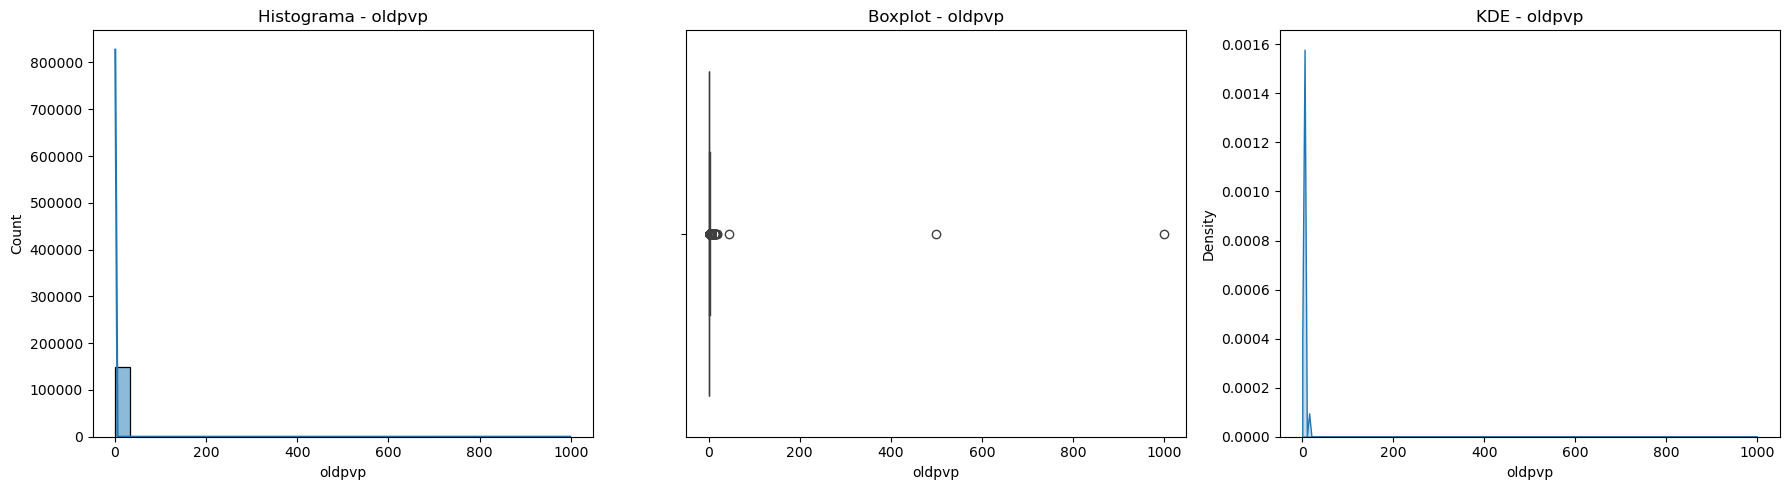

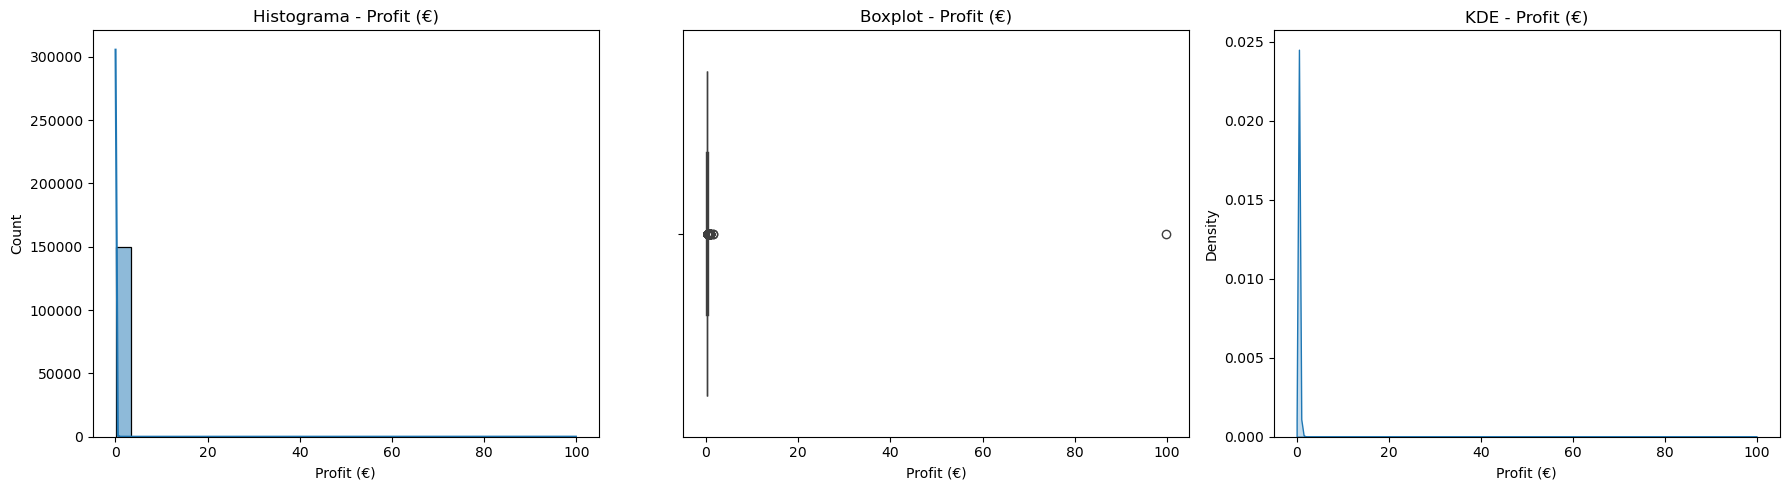

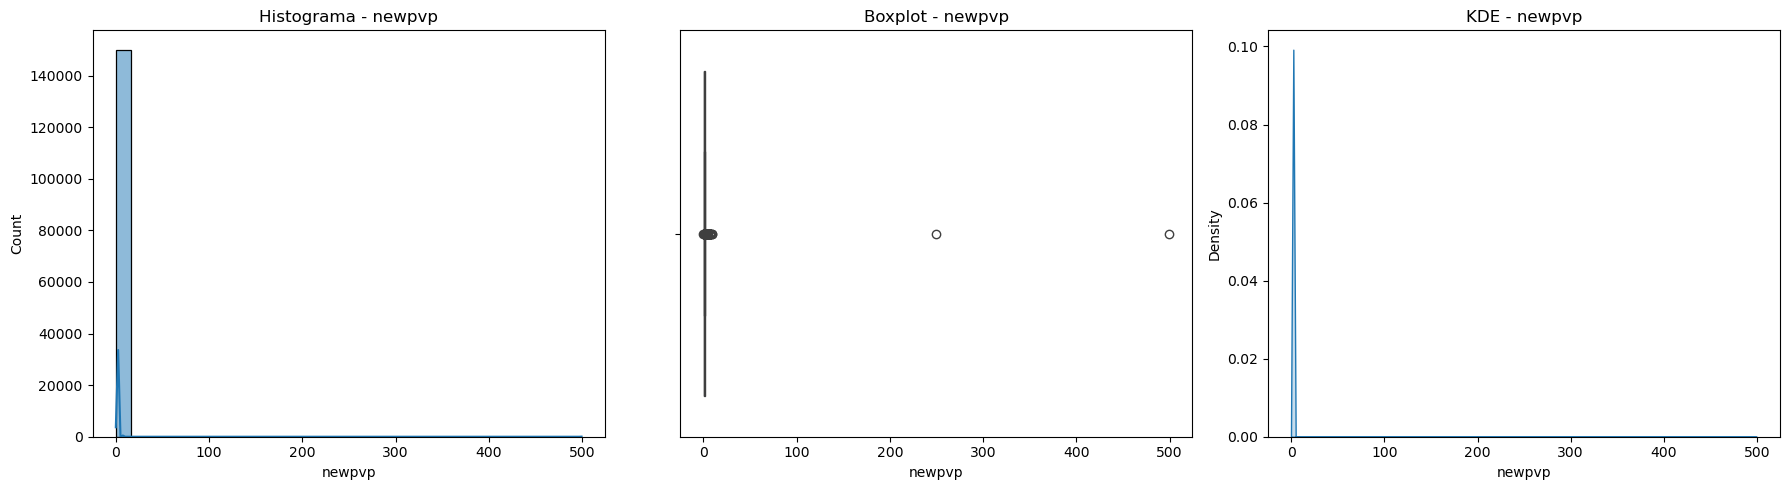

In [75]:
visualizar_distribuicoes (df[['oldpvp', 'Profit (€)', 'newpvp']])

**Conclusões:**

- Todas as três variáveis apresentam distribuições extremamente enviesadas à direita (assimetria positiva);
- A maior parte dos valores está muito próxima de zero, com alguns valores extremos muito altos (outliers);
- Os boxplots mostram pontos isolados bem distantes da maior parte dos dados, confirmando a presença de outliers severos;
- Os histogramas e KDEs mostram que quase todos os valores estão agrupados em um intervalo muito pequeno próximo de zero. Isto pode indicar que a maioria das variáveis tem valores baixos, com alguns casos excepcionalmente altos.

*Próximos passos*
- Analisar os valores onde olpvp é superior a 450 (dois outliers, um entre 450 e 600, outro superior a 800);
- Analisar os valores onde Profit é supeior a 80 (um outlier);
- Analisar os valores onde newpvp é superior a 200 (dois outliers, um entre 200 e 300, outro superior a 400).

<div style="background-color: '#006400'; padding: 15px; border: 1px solid #003366";">
    <a id='out'></a>
    <h3 style="color: #003366; margin: 0;">2.3.1.1. Analise e Tratamento dos Outliers</h3>
</div>

In [78]:
#Analisar a linha em que "oldpvp" tem um outlier superior a 800
df[df['oldpvp']>800]

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,newpvp,discount
50171,289,108,Marca_20,999.0,1,227.0,N/A,20,99.9,0.101266,2021-10-10,2021-10-02,NaT,0.0,Small,342.0,Viana do Castelo,499.5,0.5


**Conclusões:**

Verifica-se que o valor das variáveis "oldpvp", "Profit" e "newpvp" são bastante discrepantes quando comparados com os valores gerais do dataset. Por esse motivo, a solução para tratar os dados é eliminar a linha em questão por se tratar de uma fração insignificante para o dataset, não afetando a analise dos dados e o objetivo do projeto.

In [80]:
#Eliminar a linha analisada
df=df[~((df['oldpvp']>800)&(df['newpvp']>400)&(df['Profit (€)']>80))]

In [81]:
df

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,newpvp,discount
0,1,1,Marca_1,4.22,1,260.0,Card,16,0.3376,0.010050,2021-10-03,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.11,0.5
1,1,1,Marca_1,3.96,1,260.0,N/A,16,0.3168,0.005025,2021-10-02,2021-10-01,NaT,0.0,Large,4762.0,Évora,1.98,0.5
2,1,1,Marca_1,4.74,1,260.0,Cash,16,0.3792,0.010050,2021-10-03,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,2.37,0.5
3,1,1,Marca_1,4.20,1,260.0,Card,16,0.3360,0.010050,2021-10-03,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.10,0.5
4,1,1,Marca_1,4.62,1,260.0,Cash,16,0.3696,0.010050,2021-10-03,2021-10-01,2021-10-03,NaN,Large,4762.0,Évora,2.31,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150049,193,318,Marca_2,2.49,1,97.0,N/A,11,0.1364,0.100629,2021-10-19,2021-10-03,NaT,0.0,Medium,5048.0,Viseu,1.24,0.5
150050,203,318,Marca_2,2.49,1,97.0,Cash,11,0.1364,0.113208,2021-10-19,2021-10-01,2021-10-02,1.0,Medium,9370.0,Faro,1.24,0.5
150051,203,318,Marca_2,2.49,1,97.0,Cash,11,0.1364,0.113208,2021-10-19,2021-10-01,2021-10-02,1.0,Medium,9370.0,Faro,1.24,0.5
150052,139,319,Marca_24,3.49,1,141.0,Cash,19,0.4636,0.092437,2021-10-17,2021-10-06,2021-10-11,1.0,Small,1061.0,Portalegre,2.44,0.3


In [82]:
#Analisar a linha em que "oldpvp" tem um outlier superior a 400
df[df['oldpvp']>400]

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,newpvp,discount
452,64,4,Marca_3,500.0,1,134.0,Card,17,0.3315,0.25,2021-10-30,2021-10-29,2021-10-29,1.0,Medium,7879.0,Santarém,250.0,0.5


**Conclões:**

Pela análise da linha, verifica-se que os valores das variáveis "oldpvp", "newpvp", "discount", "Profit" não são coerentes, pelo que é necessário realizar uma análise mais profunda para estes valores quando sku=4.

In [84]:
#Analisar as colunas "oldpvp", "newpvp", "discount", "Profit" para sku=4
df[df['sku'] == '4'][['oldpvp','newpvp','discount','Profit (€)']].value_counts()

oldpvp  newpvp    discount  Profit (€)
2.79    1.9500    0.30      0.3315        426
        2.0900    0.25      0.3553         27
        0.0279    0.99      0.3315          1
46.00   1.9500    0.30      0.3315          1
500.00  250.0000  0.50      0.3315          1
Name: count, dtype: int64

**Conclusões:**
- Verifica-se que existem dois outliers que é necessário tratar (oldpvp=46 e oldpvp=500).
- Verifica-se que para os valores de discount, newpvp e profit quando oldpvp=46 (discount = 0.3, newpvp = 1.95 e o profit = 0.3315), o valor de oldpvp é 2.79. Conclui-se que o valor 46 para oldpvp é um erro e deve ser substituído pelo valor correto de 2.79.

*Próximos passos*
- Tratar oldpvp=46;
- Tratar as variáveis oldpvp, newpvp e dicount para oldpvp=500.

In [86]:
#Substituir o valor de oldpvp de 46 para 2.79
df.loc[(df['oldpvp'] == 46) & (df['sku'] == '4') & (df['discount'] == 0.30) & (df['Profit (€)'] == 0.3315),'oldpvp']=2.79

In [87]:
#Verificar a alteração
df[df['sku'] == '4'][['oldpvp','newpvp','discount','Profit (€)']].value_counts()

oldpvp  newpvp    discount  Profit (€)
2.79    1.9500    0.30      0.3315        427
        2.0900    0.25      0.3553         27
        0.0279    0.99      0.3315          1
500.00  250.0000  0.50      0.3315          1
Name: count, dtype: int64

*NOTA:*

Analisando o caso em que o oldpvp=500 e newpvp=250, assume-se que estes valores estão errados devido a, para o mesmo produto, não ser possível existirem diferentes valores de oldpvp principalmente quando em todas as lojas oldpvp é 2.79 e somente numa o valor é igual a 500, sendo que também o Profit é 0.3315. Desta forma, é necessário substituir os valores pelos os valores de profit=0.3315.

In [89]:
#Substituir os valores de oldpvp=500
df.loc[(df['oldpvp'] == 500) & (df['sku'] == '4') & (df['Profit (€)'] == 0.3315),'oldpvp']=2.79 #substituir oldpvp por 2.79
df.loc[(df['newpvp'] == 250) & (df['sku'] == '4') & (df['Profit (€)'] == 0.3315),'newpvp']=1.95 #substituir newpvp por 1.95
df.loc[(df['discount'] == 0.5) & (df['sku'] == '4') & (df['Profit (€)'] == 0.3315),'discount']=0.3 #substituir discount por 0.3

In [90]:
#Verificar a alteração
df[df['sku'] == '4'][['oldpvp','newpvp','discount','Profit (€)']].value_counts()

oldpvp  newpvp  discount  Profit (€)
2.79    1.9500  0.30      0.3315        428
        2.0900  0.25      0.3553         27
        0.0279  0.99      0.3315          1
Name: count, dtype: int64

*NOTA:*

Analisando os dados, verifica-se que para Profit = 0.3315 e oldpvp=2.79 existem dois valores diferentes para as variáveis newpvp e discount, o que não faz sentido. Sendo que para os dois valores diferentes, só um deles está localizado em uma única linha, é necessáiro analisar essa mesma.

In [92]:
#Analisar a linha onde oldpvp=2.79, newpvp=0.0279 e discount=0.99 para sku=4
df[(df['sku'] == '4') & (df['oldpvp']==2.79) & (df['newpvp']==0.0279) & (df['discount']==0.99)]

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,newpvp,discount
550,83,4,Marca_3,2.79,1,134.0,N/A,17,0.3315,0.5,2021-10-09,2021-10-07,NaT,0.0,Medium,4330.0,Braga,0.0279,0.99


In [93]:
#Analisar os valores de sku=4 para a loja 83
df[(df['sku'] == '4') & (df['idstore']=='83')]

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,newpvp,discount
548,83,4,Marca_3,2.79,1,134.0,Card,17,0.3315,0.50,2021-10-09,2021-10-07,2021-10-08,1.0,Medium,4330.0,Braga,1.9500,0.30
549,83,4,Marca_3,2.79,1,134.0,Card,17,0.3315,0.50,2021-10-09,2021-10-07,2021-10-08,1.0,Medium,4330.0,Braga,1.9500,0.30
550,83,4,Marca_3,2.79,1,134.0,N/A,17,0.3315,0.50,2021-10-09,2021-10-07,NaT,0.0,Medium,4330.0,Braga,0.0279,0.99
551,83,4,Marca_3,2.79,1,134.0,Card,17,0.3315,0.25,2021-10-19,2021-10-18,2021-10-19,1.0,Medium,4330.0,Braga,1.9500,0.30
552,83,4,Marca_3,2.79,1,134.0,Cash,17,0.3315,0.25,2021-10-28,2021-10-27,2021-10-28,1.0,Medium,4330.0,Braga,1.9500,0.30
553,83,4,Marca_3,2.79,1,134.0,N/A,17,0.3315,0.25,2021-10-28,2021-10-27,NaT,0.0,Medium,4330.0,Braga,1.9500,0.30
554,83,4,Marca_3,2.79,1,134.0,N/A,17,0.3315,0.25,2021-10-28,2021-10-27,NaT,0.0,Medium,4330.0,Braga,1.9500,0.30


**Conclusões:**

Para a loja 83, com base na visualização da tabela acima, verifica-se que o discount do produto é de 0.30 e o valor de newpvp é de 1.9500. Desta forma, é necessário corrigir o discount que está 0.99 para 0.30 e o newpvp que está a 0.0279 para 1.9500.

In [95]:
#Substituir os valores de discount e newpvp
df.loc[(df['newpvp'] == 0.0279) & (df['sku'] == '4') & (df['Profit (€)'] == 0.3315),'newpvp']=1.95
df.loc[(df['discount'] == 0.99) & (df['sku'] == '4') & (df['Profit (€)'] == 0.3315),'discount']=0.3

In [96]:
#Verificar os valores de curtose para as variáveis numéricas
df.kurt(numeric_only=True)

oldpvp               33.899409
labelqty              0.000000
weight (g)            2.306997
Margin (%)           -1.260139
Profit (€)            3.822766
perc_expiring_sku    -0.022494
sold                 -1.978511
selling_square_ft     0.693258
newpvp                9.447681
discount             23.466511
dtype: float64

*NOTA:*

Analisando os valores a cima, verifica-se que ainda existem valores elevados para as varáveis oldpvp e discount, pelo que é necessário verificar novamente estas variáveis quanto à existência de outliers.

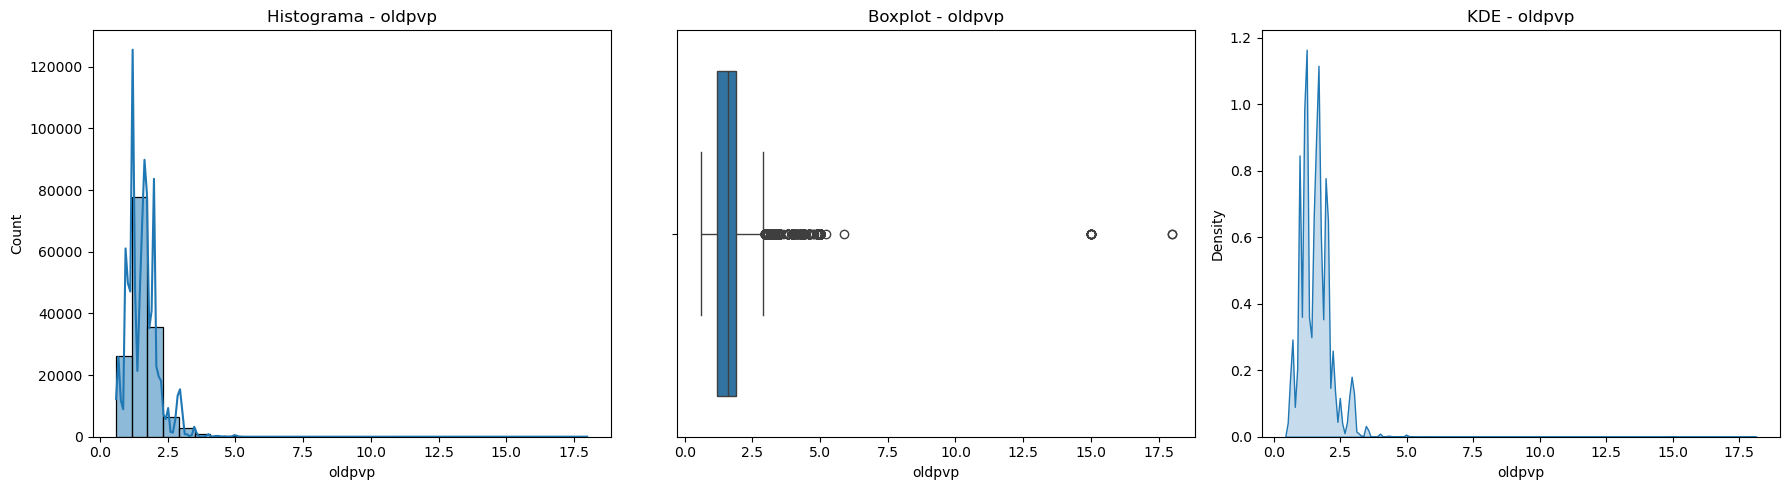

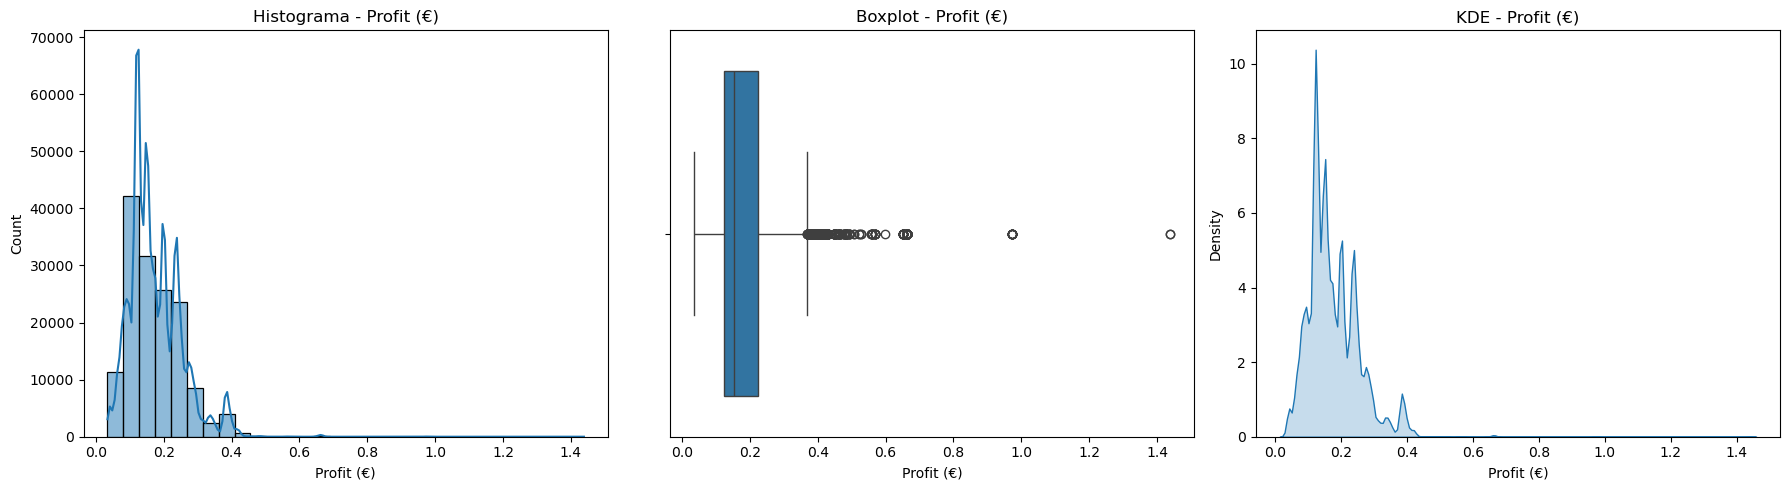

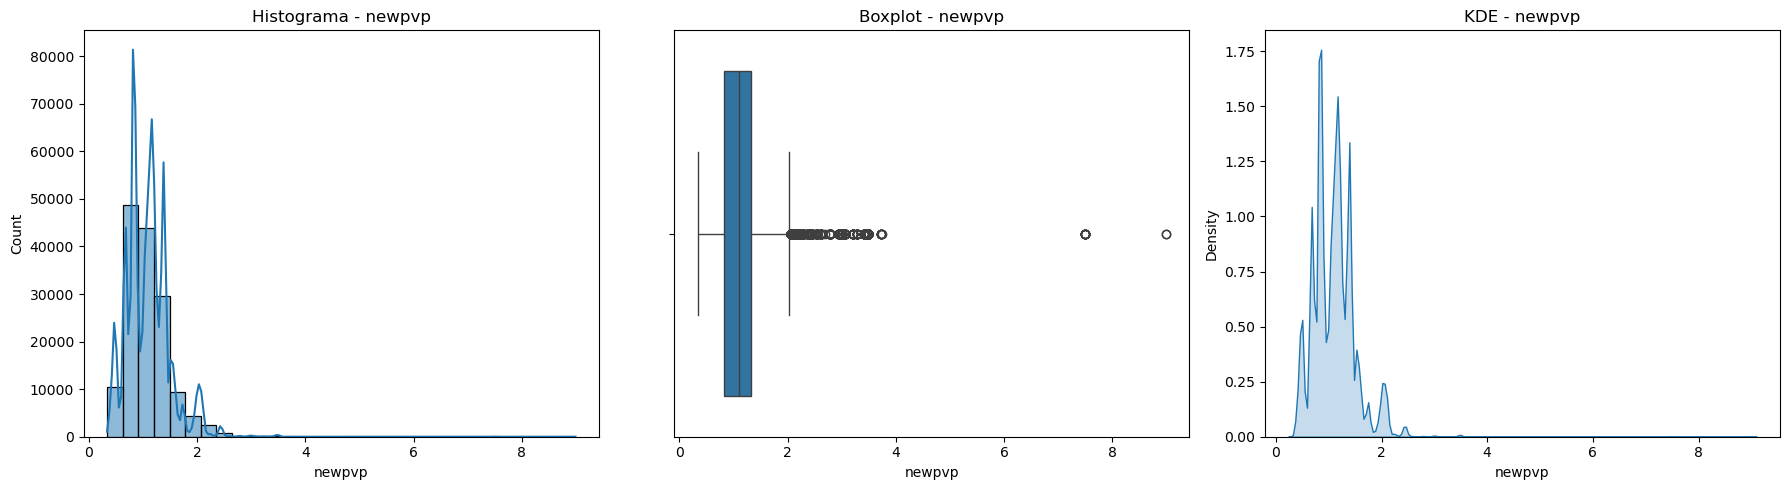

In [98]:
#Verificar a distribuição dos dados e detectar assimetrias usando Histogramas
visualizar_distribuicoes (df[['oldpvp', 'Profit (€)', 'newpvp']])

**Conclusões:**

- Todas as três variáveis apresentam distribuições extremamente enviesadas à direita (assimetria positiva);
- A maior parte dos valores está muito próxima de zero, com alguns valores extremos muito altos (outliers);
- Os boxplots mostram pontos isolados bem distantes da maior parte dos dados, confirmando a presença de outliers severos;
- Os histogramas e KDEs mostram que quase todos os valores estão agrupados em um intervalo muito pequeno próximo de zero. Isto pode indicar que a maioria das variáveis tem valores baixos, com alguns casos excepcionalmente altos.

*Próximos Passos:*

- Analisar os valores onde oldpvp é superior a 12,5 (dois outliers, um entre 12,5 e 15, outro superior a 17,5);
- Analisar os valores onde Profit é superior a 0,8 (dois outliers, um entre 0,8 e 1, outro superior a 1,4);
- Analisar os valores onde newpvp é superior a 6 (dois outliers, um entre 6 e 8, outro superior a 8).

In [100]:
#Analisar a linha em que "oldpvp" tem um outlier superior a 14
df[df['oldpvp']>14]

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,newpvp,discount
11030,14,33,Marca_14,17.99,1,266.0,Cash,16,1.4384,0.050505,2021-10-27,2021-10-22,2021-10-23,1.0,Large,21275.0,Beja,8.99,0.5
11031,14,33,Marca_14,17.99,1,266.0,N/A,16,1.4384,0.050505,2021-10-27,2021-10-22,NaT,0.0,Large,21275.0,Beja,8.99,0.5
94319,7,201,Marca_5,14.99,1,166.0,N/A,13,0.9737,0.030641,2021-10-28,2021-10-17,NaT,0.0,Large,13618.0,Guarda,7.49,0.5
94320,7,201,Marca_5,14.99,1,166.0,Cash,13,0.9737,0.030641,2021-10-28,2021-10-17,2021-10-19,1.0,Large,13618.0,Guarda,7.49,0.5
94321,7,201,Marca_5,14.99,1,166.0,Cash,13,0.9737,0.030641,2021-10-28,2021-10-17,2021-10-19,1.0,Large,13618.0,Guarda,7.49,0.5
94322,7,201,Marca_5,14.99,1,166.0,N/A,13,0.9737,0.030641,2021-10-28,2021-10-17,NaT,0.0,Large,13618.0,Guarda,7.49,0.5
94323,7,201,Marca_5,14.99,1,166.0,N/A,13,0.9737,0.030641,2021-10-28,2021-10-17,NaT,0.0,Large,13618.0,Guarda,7.49,0.5
94324,7,201,Marca_5,14.99,1,166.0,N/A,13,0.9737,0.030641,2021-10-28,2021-10-17,NaT,0.0,Large,13618.0,Guarda,7.49,0.5
94325,7,201,Marca_5,14.99,1,166.0,N/A,13,0.9737,0.030641,2021-10-28,2021-10-17,NaT,0.0,Large,13618.0,Guarda,7.49,0.5
94326,7,201,Marca_5,14.99,1,166.0,N/A,13,0.9737,0.030641,2021-10-28,2021-10-17,NaT,0.0,Large,13618.0,Guarda,7.49,0.5


NOTA:

Com base na análise do dataset, verifica-se que o valor oldpvp>14 ocorre para a sku=33, pelo que é necessário analisar os dados desta sku.

In [102]:
#Analisar as linhas em que sku=33
df[df['sku']=='33']

,idstore,sku,brand,oldpvp,labelqty,weight (g),Payment_method,Margin (%),Profit (€),perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,newpvp,discount
11030,14,33,Marca_14,17.99,1,266.0,Cash,16,1.4384,0.050505,2021-10-27,2021-10-22,2021-10-23,1.0,Large,21275.0,Beja,8.99,0.5
11031,14,33,Marca_14,17.99,1,266.0,N/A,16,1.4384,0.050505,2021-10-27,2021-10-22,NaT,0.0,Large,21275.0,Beja,8.99,0.5


NOTA:

Para os outliers apresentados acima, após uma análise aprofundada, conclui-se que os mesmos fazem sentido, visto para o newpvp, o discount, profit e margin apresentados o valor de oldpvp está correto. Por este motivo, estes dados serão assumidos como corretos.

<div style="background-color: '#006400'; padding: 15px; border: 1px solid #003366";">
    <a id='det'></a>
    <h2 style="color: #003366; margin: 0;">2.4. Análise Detalhada</h2>
</div>

In [105]:
# Uniformizar os títulos das variáveis
df.rename(columns={'Margin (%)': 'Margin'}, inplace=True)
df.rename(columns={'Profit (€)': 'Profit'}, inplace=True)
df.rename(columns={'weight (g)': 'Weight'}, inplace=True)
df.rename(columns={'Payment_method': 'Payment_method'}, inplace=True)

In [106]:
# Alterar a variável "margin" para decimal 
df['Margin'] = df['Margin'] / 100

In [107]:
# Criar um nova variável "clean_sold" que define se o produto foi ou não vendido com base nas variáveis "payment_method" e "sell_date"

def sold_calculation(X):
    if pd.notna(X['Payment_method']) and pd.notna(X['sell_date']):
        return 1
    else:
        return 0
        
df['clean_sold'] = df.apply(sold_calculation,axis=1)

In [108]:
#Substituir os valores ausentes (NaN) da coluna 'sold' pelos valores correspondentes da coluna 'clean_sold'
df['sold'] = df['sold'].fillna(df['clean_sold'])

In [109]:
df

,idstore,sku,brand,oldpvp,labelqty,Weight,Payment_method,Margin,Profit,perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,newpvp,discount,clean_sold
0,1,1,Marca_1,4.22,1,260.0,Card,0.16,0.3376,0.010050,2021-10-03,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.11,0.5,1
1,1,1,Marca_1,3.96,1,260.0,N/A,0.16,0.3168,0.005025,2021-10-02,2021-10-01,NaT,0.0,Large,4762.0,Évora,1.98,0.5,0
2,1,1,Marca_1,4.74,1,260.0,Cash,0.16,0.3792,0.010050,2021-10-03,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,2.37,0.5,1
3,1,1,Marca_1,4.20,1,260.0,Card,0.16,0.3360,0.010050,2021-10-03,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.10,0.5,1
4,1,1,Marca_1,4.62,1,260.0,Cash,0.16,0.3696,0.010050,2021-10-03,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,2.31,0.5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150049,193,318,Marca_2,2.49,1,97.0,N/A,0.11,0.1364,0.100629,2021-10-19,2021-10-03,NaT,0.0,Medium,5048.0,Viseu,1.24,0.5,0
150050,203,318,Marca_2,2.49,1,97.0,Cash,0.11,0.1364,0.113208,2021-10-19,2021-10-01,2021-10-02,1.0,Medium,9370.0,Faro,1.24,0.5,1
150051,203,318,Marca_2,2.49,1,97.0,Cash,0.11,0.1364,0.113208,2021-10-19,2021-10-01,2021-10-02,1.0,Medium,9370.0,Faro,1.24,0.5,1
150052,139,319,Marca_24,3.49,1,141.0,Cash,0.19,0.4636,0.092437,2021-10-17,2021-10-06,2021-10-11,1.0,Small,1061.0,Portalegre,2.44,0.3,1


*NOTA:*

Como a coluna Sold foi substituida pelos valores da coluna Clean_Sold, não faz sentido manter esta coluna.

In [111]:
#Eliminar a coluna 'Clean_Sold'
df=df.drop(['clean_sold'],axis=1)

In [112]:
#Filtrar as linhas onde a expiring_date é maior do que a labelling_date e onde a coluna perc_expiring_sku está ausente (NaN)
df[(df['expiring_date'] > df['labelling_date']) & (pd.isna(df['perc_expiring_sku']))]

,idstore,sku,brand,oldpvp,labelqty,Weight,Payment_method,Margin,Profit,perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,newpvp,discount
13868,89,45,Marca_18,2.19,1,300.0,Card,0.20,0.3060,NaN,2021-10-27,2021-10-26,2021-10-26,1.0,Medium,5829.0,Lisboa,1.53,0.30
13869,89,45,Marca_18,2.19,1,300.0,Cash,0.20,0.3060,NaN,2021-10-27,2021-10-26,2021-10-26,1.0,Medium,5829.0,Lisboa,1.53,0.30
13870,89,45,Marca_18,2.19,1,300.0,N/A,0.20,0.3060,NaN,2021-10-27,2021-10-26,NaT,0.0,Medium,5829.0,Lisboa,1.53,0.30
69819,182,149,Marca_12,2.65,1,202.0,N/A,0.12,0.2220,NaN,2021-10-02,2021-10-01,NaT,0.0,Small,703.0,Viseu,1.85,0.30
69820,182,149,Marca_12,2.65,1,202.0,Cash,0.12,0.2220,NaN,2021-10-02,2021-10-01,2021-10-01,1.0,Small,703.0,Viseu,1.85,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78747,92,176,Marca_10,1.99,1,193.0,Card,0.13,0.1807,NaN,2021-10-17,2021-10-16,2021-10-16,1.0,Medium,7230.0,Beja,1.39,0.30
78748,92,176,Marca_10,2.03,1,193.0,Card,0.13,0.1846,NaN,2021-10-17,2021-10-16,2021-10-16,1.0,Medium,7230.0,Beja,1.42,0.30
78749,92,176,Marca_10,1.19,1,193.0,Cash,0.13,0.1157,NaN,2021-10-24,2021-10-23,2021-10-23,1.0,Medium,7230.0,Beja,0.89,0.25
78750,92,176,Marca_10,1.43,1,193.0,Cash,0.13,0.1391,NaN,2021-10-24,2021-10-23,2021-10-23,1.0,Medium,7230.0,Beja,1.07,0.25


In [113]:
#Verificar quantas linhas existem quando a coluna 'per_expiring_sku' contém valores ausentes
df[pd.isna(df['perc_expiring_sku'])].shape[0]

125

In [114]:
df['perc_expiring_sku'].value_counts()

perc_expiring_sku
0.666667    38564
0.333333    36830
0.200000    22669
0.400000    20021
0.000000    14170
            ...  
0.037190        1
0.031250        1
1.800000        1
0.072727        1
0.044025        1
Name: count, Length: 152, dtype: int64

<Axes: ylabel='Frequency'>

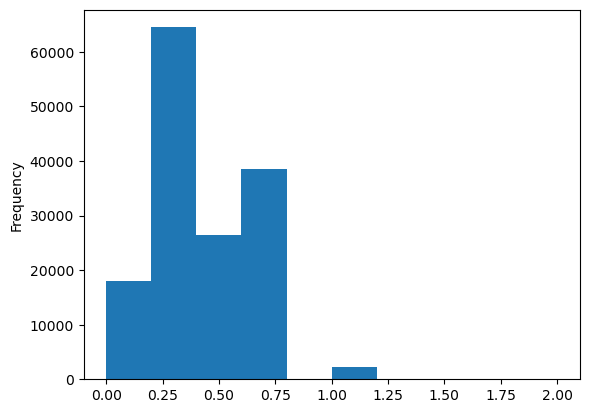

In [115]:
#Verificar a distribuição dos valores da coluna 'perc_expiring_sku'a partir de um histograma
df['perc_expiring_sku'].plot.hist()

**Conclusões:**

Pela a análise dos dados verifica-se que existem valores superiores a 1 para a varável Perc_Expiring_Sku, o que não faz sentido pois trata-se de uma percentagem (que deveria estar entre 0 e 1). Esses valores provavelmente indicam erros nos dados e precisam ser tratados.

*Próximos Passos:*
 
 - Susbtituir para NaN os valores superiores a 1;
 - Aplicar a média por marca e loja para preencher os missing values.

In [117]:
#Substituir todos os valores da coluna 'perc_expiring_sku' que são maiores que 1 por NaN.
df.loc[df['perc_expiring_sku'] > 1, 'perc_expiring_sku'] = np.nan

In [118]:
#Preencher os valores ausentes (NaN) na coluna 'perc_expiring_sku' com a média dos valores dentro de cada grupo formado por 'brand' e 'idstore'.
def fill_na_with_mean(X):
    X['perc_expiring_sku'] = X.groupby(['brand', 'idstore'])['perc_expiring_sku'].transform(lambda x: x.fillna(x.mean()))
    return X

df = fill_na_with_mean(df)

In [119]:
df

,idstore,sku,brand,oldpvp,labelqty,Weight,Payment_method,Margin,Profit,perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,newpvp,discount
0,1,1,Marca_1,4.22,1,260.0,Card,0.16,0.3376,0.010050,2021-10-03,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.11,0.5
1,1,1,Marca_1,3.96,1,260.0,N/A,0.16,0.3168,0.005025,2021-10-02,2021-10-01,NaT,0.0,Large,4762.0,Évora,1.98,0.5
2,1,1,Marca_1,4.74,1,260.0,Cash,0.16,0.3792,0.010050,2021-10-03,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,2.37,0.5
3,1,1,Marca_1,4.20,1,260.0,Card,0.16,0.3360,0.010050,2021-10-03,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.10,0.5
4,1,1,Marca_1,4.62,1,260.0,Cash,0.16,0.3696,0.010050,2021-10-03,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,2.31,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150049,193,318,Marca_2,2.49,1,97.0,N/A,0.11,0.1364,0.100629,2021-10-19,2021-10-03,NaT,0.0,Medium,5048.0,Viseu,1.24,0.5
150050,203,318,Marca_2,2.49,1,97.0,Cash,0.11,0.1364,0.113208,2021-10-19,2021-10-01,2021-10-02,1.0,Medium,9370.0,Faro,1.24,0.5
150051,203,318,Marca_2,2.49,1,97.0,Cash,0.11,0.1364,0.113208,2021-10-19,2021-10-01,2021-10-02,1.0,Medium,9370.0,Faro,1.24,0.5
150052,139,319,Marca_24,3.49,1,141.0,Cash,0.19,0.4636,0.092437,2021-10-17,2021-10-06,2021-10-11,1.0,Small,1061.0,Portalegre,2.44,0.3


<Axes: ylabel='Frequency'>

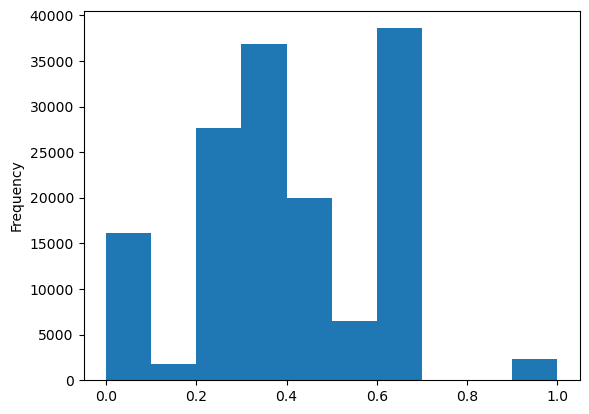

In [120]:
#Verificar o histograma
df['perc_expiring_sku'].plot.hist()

*NOTA:*

Analisando o gráfico verifica-se que todos os valores superiores a 1 foram substituidos, no entando ai existem valores nulos que precisam de ser tratados.

In [122]:
#Filtrar as linhas onde a coluna 'per_expiring_sku' contém valores ausentes
df[pd.isna(df['perc_expiring_sku'])]

,idstore,sku,brand,oldpvp,labelqty,Weight,Payment_method,Margin,Profit,perc_expiring_sku,expiring_date,labelling_date,sell_date,sold,type,selling_square_ft,district,newpvp,discount
62187,281,134,Marca_30,1.09,1,260.0,Card,0.12,0.0648,NaN,2021-10-28,2021-10-19,2021-10-20,1.0,Small,455.0,Porto,0.54,0.50
78684,91,176,Marca_10,1.12,1,193.0,N/A,0.13,0.1092,NaN,2021-10-31,2021-10-31,NaT,0.0,Medium,8952.0,Aveiro,0.84,0.25
78685,91,176,Marca_10,1.47,1,193.0,N/A,0.13,0.1326,NaN,2021-10-27,2021-10-27,NaT,0.0,Medium,8952.0,Aveiro,1.02,0.31
78686,91,176,Marca_10,1.47,1,193.0,N/A,0.13,0.1326,NaN,2021-10-27,2021-10-27,NaT,0.0,Medium,8952.0,Aveiro,1.02,0.31
78687,91,176,Marca_10,1.22,1,193.0,Card,0.13,0.1105,NaN,2021-10-27,2021-10-27,2021-10-27,1.0,Medium,8952.0,Aveiro,0.85,0.30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78752,92,176,Marca_10,1.26,1,193.0,Card,0.13,0.1222,NaN,2021-10-25,2021-10-25,2021-10-25,1.0,Medium,7230.0,Beja,0.94,0.25
78753,92,176,Marca_10,1.47,1,193.0,Cash,0.13,0.1430,NaN,2021-10-29,2021-10-29,2021-10-29,1.0,Medium,7230.0,Beja,1.10,0.25
78754,92,176,Marca_10,1.12,1,193.0,Cash,0.13,0.1092,NaN,2021-10-29,2021-10-29,2021-10-29,1.0,Medium,7230.0,Beja,0.84,0.25
78755,92,176,Marca_10,0.84,1,193.0,Card,0.13,0.0819,NaN,2021-10-29,2021-10-29,2021-10-29,1.0,Medium,7230.0,Beja,0.63,0.25


In [123]:
#Preencher os valores ausentes (NaN) na coluna 'perc_expiring_sku' com a média geral da própria coluna
def fill_na_with_mean_Total(X):
    X['perc_expiring_sku'] = X['perc_expiring_sku'].transform(lambda x: x.fillna(x.mean()))
    return X

df = fill_na_with_mean_Total(df)

In [124]:
#Alterar os nomes das colunas do DataFrame, convertendo a primeira letra de cada palavra para maiúscula e o restante para minúscula.
df.columns = df.columns.str.title()

In [125]:
df

,Idstore,Sku,Brand,Oldpvp,Labelqty,Weight,Payment_Method,Margin,Profit,Perc_Expiring_Sku,Expiring_Date,Labelling_Date,Sell_Date,Sold,Type,Selling_Square_Ft,District,Newpvp,Discount
0,1,1,Marca_1,4.22,1,260.0,Card,0.16,0.3376,0.010050,2021-10-03,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.11,0.5
1,1,1,Marca_1,3.96,1,260.0,N/A,0.16,0.3168,0.005025,2021-10-02,2021-10-01,NaT,0.0,Large,4762.0,Évora,1.98,0.5
2,1,1,Marca_1,4.74,1,260.0,Cash,0.16,0.3792,0.010050,2021-10-03,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,2.37,0.5
3,1,1,Marca_1,4.20,1,260.0,Card,0.16,0.3360,0.010050,2021-10-03,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.10,0.5
4,1,1,Marca_1,4.62,1,260.0,Cash,0.16,0.3696,0.010050,2021-10-03,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,2.31,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150049,193,318,Marca_2,2.49,1,97.0,N/A,0.11,0.1364,0.100629,2021-10-19,2021-10-03,NaT,0.0,Medium,5048.0,Viseu,1.24,0.5
150050,203,318,Marca_2,2.49,1,97.0,Cash,0.11,0.1364,0.113208,2021-10-19,2021-10-01,2021-10-02,1.0,Medium,9370.0,Faro,1.24,0.5
150051,203,318,Marca_2,2.49,1,97.0,Cash,0.11,0.1364,0.113208,2021-10-19,2021-10-01,2021-10-02,1.0,Medium,9370.0,Faro,1.24,0.5
150052,139,319,Marca_24,3.49,1,141.0,Cash,0.19,0.4636,0.092437,2021-10-17,2021-10-06,2021-10-11,1.0,Small,1061.0,Portalegre,2.44,0.3


<div class="alert alert-block" style="background-color:#AEC6CF; border: 1px solid #003366">
<a id='preprocessing'>
<font color = '#003366'> 
    
# 3. Pré-processamento de dados</font>
</a>
    
</div>

<div style="background-color: '#006400'; padding: 15px; border: 1px solid #003366";">
    <a id='dados'></a>
    <h2 style="color: #003366; margin: 0;">3.1. Limpeza de Dados</h2>
</div>

In [128]:
#Criar uma cópia exata do DataFrame e a armazenar na variável df_clean
df_clean = df.copy()

<div style="background-color: '#006400'; padding: 15px; border: 1px solid #003366";">
    <a id='values'></a>
    <h3 style="color: #003366; margin: 0;">3.1.1. Missing Values</h3>
</div>

In [130]:
#Identificar e listar as colunas que possuem valores ausentes (NaN) 
missing_counts = df_clean.isnull().sum()
missing_counts[missing_counts > 0]

Oldpvp                  22
Weight                 428
Sell_Date            69542
Selling_Square_Ft    10779
Newpvp                  28
Discount                28
dtype: int64

In [131]:
#Verificar o número de valores ausentes
missing_counts.sum().sum()

80827

<div style="background-color: '#006400'; padding: 15px; border: 1px solid #003366";">
    <a id='oldpvp'></a>
    <h3 style="color: #003366; margin: 0;">3.1.1.1. Tratamento Missing Values da variável oldpvp</h3>
</div>

In [133]:
#Filtrar as primeiras 5 linhas onde a coluna 'Oldpvp' contém valores ausentes 
df[pd.isna(df['Oldpvp'])][:5]

,Idstore,Sku,Brand,Oldpvp,Labelqty,Weight,Payment_Method,Margin,Profit,Perc_Expiring_Sku,Expiring_Date,Labelling_Date,Sell_Date,Sold,Type,Selling_Square_Ft,District,Newpvp,Discount
15,2,2,Marca_2,NaN,1,222.0,Cash,0.15,0.2385,0.121212,2021-10-25,2021-10-13,2021-10-14,1.0,Large,12358.0,Bragança,1.59,0.5
877,59,7,Marca_5,NaN,1,131.0,N/A,0.10,0.1530,0.666667,2021-10-17,2021-10-15,NaT,0.0,Medium,6540.0,Guarda,1.53,0.3
959,14,8,Marca_2,NaN,1,174.0,Cash,0.15,0.1245,0.200000,2021-10-29,2021-10-28,2021-10-28,1.0,Large,21275.0,Beja,0.83,0.3
7568,289,12,Marca_2,NaN,1,225.0,Card,0.19,0.1843,0.666667,2021-10-16,2021-10-14,2021-10-15,1.0,Small,342.0,Viana do Castelo,0.97,0.3
7575,289,12,Marca_2,NaN,1,225.0,Card,0.19,0.1843,0.666667,2021-10-05,2021-10-03,2021-10-04,1.0,Small,342.0,Viana do Castelo,0.97,0.3


In [134]:
#Preencher os valores ausentes (NaN) na coluna 'Oldpvp' estimando o valor a partir das colunas 'Newpvp' e 'Discount'.
def fill_na_oldpvp(X):
    X['Oldpvp'] = X['Oldpvp'].transform(lambda x: x.fillna(X['Newpvp']/(1-X['Discount'])))
    return X
    
df = fill_na_oldpvp(df)

<div style="background-color: '#006400'; padding: 15px; border: 1px solid #003366";">
    <a id='weight'></a>
    <h3 style="color: #003366; margin: 0;">3.1.1.2.Tratamento Missing Values da variável weight</h3>
</div>

In [136]:
#Filtrar as linhas onde a coluna 'Weight' contém valores ausentes
df[pd.isna(df['Weight'])]

,Idstore,Sku,Brand,Oldpvp,Labelqty,Weight,Payment_Method,Margin,Profit,Perc_Expiring_Sku,Expiring_Date,Labelling_Date,Sell_Date,Sold,Type,Selling_Square_Ft,District,Newpvp,Discount
46,7,2,Marca_2,3.19,1,NaN,N/A,0.15,0.3585,0.111111,2021-10-26,2021-10-15,NaT,0.0,Large,13618.0,Guarda,2.39,0.25
147,14,4,Marca_3,2.79,1,NaN,Card,0.17,0.3315,0.250000,2021-10-28,2021-10-27,2021-10-27,1.0,Large,21275.0,Beja,1.95,0.30
169,18,4,Marca_3,2.79,1,NaN,N/A,0.17,0.3315,0.250000,2021-10-21,2021-10-20,NaT,0.0,Large,12373.0,Leiria,1.95,0.30
180,21,4,Marca_3,2.79,1,NaN,Card,0.17,0.3315,0.250000,2021-10-09,2021-10-08,2021-10-09,1.0,Large,17657.0,Guarda,1.95,0.30
16381,199,47,Marca_2,2.95,1,NaN,Cash,0.17,0.2499,0.060606,2021-10-25,2021-10-17,2021-10-19,1.0,Medium,12009.0,Castelo Branco,1.47,0.50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78923,217,181,Marca_25,1.29,1,NaN,Cash,0.20,0.1800,0.250000,2021-10-12,2021-10-11,2021-10-12,1.0,Small,115.0,Lisboa,0.90,0.30
78924,217,181,Marca_25,1.29,1,NaN,Cash,0.20,0.1800,0.250000,2021-10-12,2021-10-11,2021-10-12,1.0,Small,115.0,Lisboa,0.90,0.30
78925,217,181,Marca_25,1.29,1,NaN,Card,0.20,0.1800,0.000000,2021-10-24,2021-10-24,2021-10-24,1.0,Small,115.0,Lisboa,0.90,0.30
78926,217,181,Marca_25,1.29,1,NaN,Cash,0.20,0.1800,0.000000,2021-10-24,2021-10-24,2021-10-24,1.0,Small,115.0,Lisboa,0.90,0.30


In [137]:
#Identificar os SKUs que possuem mais de um valor distinto de peso (Weight)
df.groupby('Sku')['Weight'].nunique().reset_index().query('Weight > 1')

,Sku,Weight


*NOTA:*

Verifica-se que para cada Sku apenas existe um valor de Weight (descartando os Nan). Desta forma, os valores Nan serão necessários serem tratados através da substituição dos mesmo pelo valor Weight do Sku referidos no resto dos registos.

In [139]:
#Preencher os valores ausentes (NaN) na coluna 'Weight' usando o primeiro valor não nulo dentro de cada grupo de 'Sku'
def fill_na_copy_weight(X):
    X['Weight'] = X.groupby(['Sku'])['Weight'].transform(lambda x: x.fillna(x.iloc[0]))
    return X

df = fill_na_copy_weight(df)

In [140]:
#Identificar os valores ausentes (NaN) 
df[pd.isna(df['Weight'])][['Sku']].value_counts()

Sku
170    277
181     95
47      34
148     18
Name: count, dtype: int64

*NOTA:*

Verifica-se que ainda existem Nan. Desta forma, os missing values serão substituidos por 0 para facilitar as próximas análises.

In [142]:
#Substituir os valores Nan da varável 'Weight' por 0
df['Weight'] = df['Weight'].fillna(0)

<div style="background-color: '#006400'; padding: 15px; border: 1px solid #003366";">
    <a id='sell'></a>
    <h3 style="color: #003366; margin: 0;">3.1.1.3.Tratamento Missing Values da variável sell-date</h3>
</div>


In [144]:
#Filtrar as primeiras 5 linhas onde a coluna 'Sell_Date' contém valores ausentes 
df[pd.isna(df['Sell_Date'])][:5]

,Idstore,Sku,Brand,Oldpvp,Labelqty,Weight,Payment_Method,Margin,Profit,Perc_Expiring_Sku,Expiring_Date,Labelling_Date,Sell_Date,Sold,Type,Selling_Square_Ft,District,Newpvp,Discount
1,1,1,Marca_1,3.96,1,260.0,N/A,0.16,0.3168,0.005025,2021-10-02,2021-10-01,NaT,0.0,Large,4762.0,Évora,1.98,0.50
8,1,1,Marca_1,4.62,1,260.0,N/A,0.16,0.3696,0.005025,2021-10-02,2021-10-01,NaT,0.0,Large,4762.0,Évora,2.31,0.50
13,1,1,Marca_1,4.76,1,260.0,N/A,0.16,0.3808,0.010050,2021-10-03,2021-10-01,NaT,0.0,Large,4762.0,Évora,2.38,0.50
33,7,2,Marca_2,3.19,1,222.0,N/A,0.15,0.3585,0.111111,2021-10-26,2021-10-15,NaT,0.0,Large,13618.0,Guarda,2.39,0.25
36,7,2,Marca_2,3.19,1,222.0,N/A,0.15,0.3585,0.111111,2021-10-26,2021-10-15,NaT,0.0,Large,13618.0,Guarda,2.39,0.25


*NOTA:*

Analisando os valores nulos, verifica-se que para os casos em questão os produtos não foram vendidos. Desta forma, conclui-se que não faz sentido tratar os missing values visto que não se tratam de erros.

<div style="background-color: '#006400'; padding: 15px; border: 1px solid #003366";">
    <a id='selling'></a>
    <h3 style="color: #003366; margin: 0;">3.1.1.4.Tratamento Missing Values da variável selling_square_ft</h3>
</div>


In [147]:
#Filtrar todas as linhas onde a coluna 'Selling_Square_Ft' contém valores ausentes (NaN)
df[pd.isna(df['Selling_Square_Ft'])]

,Idstore,Sku,Brand,Oldpvp,Labelqty,Weight,Payment_Method,Margin,Profit,Perc_Expiring_Sku,Expiring_Date,Labelling_Date,Sell_Date,Sold,Type,Selling_Square_Ft,District,Newpvp,Discount
323,45,4,Marca_3,2.79,1,134.0,N/A,0.17,0.3315,0.250000,2021-10-02,2021-10-01,NaT,0.0,Medium,NaN,Setúbal,1.95,0.3
324,45,4,Marca_3,2.79,1,134.0,N/A,0.17,0.3315,0.250000,2021-10-02,2021-10-01,NaT,0.0,Medium,NaN,Setúbal,1.95,0.3
325,45,4,Marca_3,2.79,1,134.0,Card,0.17,0.3315,0.250000,2021-10-07,2021-10-06,2021-10-06,1.0,Medium,NaN,Setúbal,1.95,0.3
326,45,4,Marca_3,2.79,1,134.0,Cash,0.17,0.3315,0.250000,2021-10-07,2021-10-06,2021-10-07,1.0,Medium,NaN,Setúbal,1.95,0.3
327,45,4,Marca_3,2.79,1,134.0,Cash,0.17,0.3315,0.250000,2021-10-26,2021-10-25,2021-10-25,1.0,Medium,NaN,Setúbal,1.95,0.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150010,137,318,Marca_2,2.49,1,97.0,N/A,0.11,0.1364,0.062893,2021-10-20,2021-10-10,NaT,0.0,Small,NaN,Beja,1.24,0.5
150011,137,318,Marca_2,2.49,1,97.0,N/A,0.11,0.1364,0.062893,2021-10-20,2021-10-10,NaT,0.0,Small,NaN,Beja,1.24,0.5
150012,137,318,Marca_2,2.49,1,97.0,N/A,0.11,0.1364,0.062893,2021-10-20,2021-10-10,NaT,0.0,Small,NaN,Beja,1.24,0.5
150013,137,318,Marca_2,2.49,1,97.0,N/A,0.11,0.1364,0.062893,2021-10-20,2021-10-10,NaT,0.0,Small,NaN,Beja,1.24,0.5


In [148]:
#Preencher os valores ausentes (NaN) na coluna 'Selling_Square_Ft' usando a média da categoria 'Type'
def fill_na_sqr_ft(X):
    X['Selling_Square_Ft'] = X.groupby(['Type'])['Selling_Square_Ft'].transform(lambda x: x.fillna(x.mean()))
    return X

In [149]:
df=fill_na_sqr_ft(df)

In [150]:
df.isna().sum()

Idstore                  0
Sku                      0
Brand                    0
Oldpvp                   0
Labelqty                 0
Weight                   0
Payment_Method           0
Margin                   0
Profit                   0
Perc_Expiring_Sku        0
Expiring_Date            0
Labelling_Date           0
Sell_Date            69542
Sold                     0
Type                     0
Selling_Square_Ft        0
District                 0
Newpvp                  28
Discount                28
dtype: int64

 <div style="background-color: '#006400'; padding: 15px; border: 1px solid #003366";">
    <a id='discount'></a>
    <h3 style="color: #003366; margin: 0;">3.1.1.5.Tratamento Missing Values da variável discount</h3>
</div>

In [152]:
#Filtrar as primeiras 5 linhas onde a coluna 'Discount' contém valores ausentes 
df[pd.isna(df['Discount'])][:5]

,Idstore,Sku,Brand,Oldpvp,Labelqty,Weight,Payment_Method,Margin,Profit,Perc_Expiring_Sku,Expiring_Date,Labelling_Date,Sell_Date,Sold,Type,Selling_Square_Ft,District,Newpvp,Discount
10,1,1,Marca_1,5.23,1,260.0,Card,0.16,0.4176,0.010050,2021-10-03,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,NaN,NaN
875,59,7,Marca_5,2.19,1,131.0,Cash,0.10,0.1530,0.666667,2021-10-17,2021-10-15,2021-10-16,1.0,Medium,6540.0,Guarda,NaN,NaN
955,14,8,Marca_2,1.19,1,174.0,Card,0.15,0.1245,0.200000,2021-10-29,2021-10-28,2021-10-28,1.0,Large,21275.0,Beja,NaN,NaN
7564,14,12,Marca_2,1.39,1,225.0,N/A,0.19,0.1843,0.000000,2021-10-21,2021-10-21,NaT,0.0,Large,21275.0,Beja,NaN,NaN
7572,289,12,Marca_2,1.39,1,225.0,N/A,0.19,0.1843,0.666667,2021-10-16,2021-10-14,NaT,0.0,Small,342.0,Viana do Castelo,NaN,NaN


In [153]:
#Preencher os valores ausentes (NaN) na coluna 'Discount' usando o primeiro valor não nulo (iloc[0]) dentro de cada grupo formado pelas colunas 'Sku', 'Idstore', 'Oldpvp', 'Profit'.
def fill_na_copy_discount(X):
    X['Discount'] = X.groupby(['Sku','Idstore','Oldpvp','Profit'])['Discount'].transform(lambda x: x.fillna(x.iloc[0]))
    return X

df = fill_na_copy_discount(df)

In [154]:
#Filtrar todas as linhas onde a coluna 'Discount' contém valores ausentes (NaN)
df[pd.isna(df['Discount'])]

,Idstore,Sku,Brand,Oldpvp,Labelqty,Weight,Payment_Method,Margin,Profit,Perc_Expiring_Sku,Expiring_Date,Labelling_Date,Sell_Date,Sold,Type,Selling_Square_Ft,District,Newpvp,Discount
10,1,1,Marca_1,5.23,1,260.0,Card,0.16,0.4176,0.010050,2021-10-03,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,NaN,NaN
7578,98,12,Marca_2,1.39,1,225.0,Cash,0.19,0.1843,0.333333,2021-10-19,2021-10-18,2021-10-19,1.0,Medium,3344.0,Faro,NaN,NaN
7583,98,12,Marca_2,1.39,1,225.0,Card,0.19,0.1843,0.333333,2021-10-15,2021-10-14,2021-10-14,1.0,Medium,3344.0,Faro,NaN,NaN
7585,98,12,Marca_2,1.39,1,225.0,N/A,0.19,0.1843,0.333333,2021-10-15,2021-10-14,NaT,0.0,Medium,3344.0,Faro,NaN,NaN
21531,59,61,Marca_2,0.69,1,186.0,Cash,0.13,0.0624,0.666667,2021-10-12,2021-10-10,2021-10-11,1.0,Medium,6540.0,Guarda,NaN,NaN
21539,59,61,Marca_2,0.69,1,186.0,N/A,0.13,0.0624,0.666667,2021-10-14,2021-10-12,NaT,0.0,Medium,6540.0,Guarda,NaN,NaN


 <div style="background-color: '#006400'; padding: 15px; border: 1px solid #003366";">
    <a id='new_pvp'></a>
    <h3 style="color: #003366; margin: 0;">3.1.1.6.Tratamento Missing Values da variável new_pvp</h3>
</div>

In [156]:
#Filtrar todas as linhas onde a coluna 'Newpvp' contém valores ausentes (NaN)
df[pd.isna(df['Newpvp'])][:5]

,Idstore,Sku,Brand,Oldpvp,Labelqty,Weight,Payment_Method,Margin,Profit,Perc_Expiring_Sku,Expiring_Date,Labelling_Date,Sell_Date,Sold,Type,Selling_Square_Ft,District,Newpvp,Discount
10,1,1,Marca_1,5.23,1,260.0,Card,0.16,0.4176,0.010050,2021-10-03,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,NaN,NaN
875,59,7,Marca_5,2.19,1,131.0,Cash,0.10,0.1530,0.666667,2021-10-17,2021-10-15,2021-10-16,1.0,Medium,6540.0,Guarda,NaN,0.3
955,14,8,Marca_2,1.19,1,174.0,Card,0.15,0.1245,0.200000,2021-10-29,2021-10-28,2021-10-28,1.0,Large,21275.0,Beja,NaN,0.3
7564,14,12,Marca_2,1.39,1,225.0,N/A,0.19,0.1843,0.000000,2021-10-21,2021-10-21,NaT,0.0,Large,21275.0,Beja,NaN,0.3
7572,289,12,Marca_2,1.39,1,225.0,N/A,0.19,0.1843,0.666667,2021-10-16,2021-10-14,NaT,0.0,Small,342.0,Viana do Castelo,NaN,0.3


In [157]:
#Preencher os valores ausentes (NaN) na coluna 'Newpvp' com o primeiro valor não nulo dentro de cada grupo formado pelas colunas 'Sku', 'Idstore', 'Oldpvp', 'Profit'
def fill_na_copy_newpvp(X):
    X['Newpvp'] = X.groupby(['Sku','Idstore','Oldpvp','Profit'])['Newpvp'].transform(lambda x: x.fillna(x.iloc[0]))
    return X

df = fill_na_copy_newpvp(df)

In [158]:
#Filtrar todas as linhas onde a coluna 'Newpvp' contém valores ausentes (NaN)
df[pd.isna(df['Newpvp'])]

,Idstore,Sku,Brand,Oldpvp,Labelqty,Weight,Payment_Method,Margin,Profit,Perc_Expiring_Sku,Expiring_Date,Labelling_Date,Sell_Date,Sold,Type,Selling_Square_Ft,District,Newpvp,Discount
10,1,1,Marca_1,5.23,1,260.0,Card,0.16,0.4176,0.010050,2021-10-03,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,NaN,NaN
7578,98,12,Marca_2,1.39,1,225.0,Cash,0.19,0.1843,0.333333,2021-10-19,2021-10-18,2021-10-19,1.0,Medium,3344.0,Faro,NaN,NaN
7583,98,12,Marca_2,1.39,1,225.0,Card,0.19,0.1843,0.333333,2021-10-15,2021-10-14,2021-10-14,1.0,Medium,3344.0,Faro,NaN,NaN
7585,98,12,Marca_2,1.39,1,225.0,N/A,0.19,0.1843,0.333333,2021-10-15,2021-10-14,NaT,0.0,Medium,3344.0,Faro,NaN,NaN
21531,59,61,Marca_2,0.69,1,186.0,Cash,0.13,0.0624,0.666667,2021-10-12,2021-10-10,2021-10-11,1.0,Medium,6540.0,Guarda,NaN,NaN
21539,59,61,Marca_2,0.69,1,186.0,N/A,0.13,0.0624,0.666667,2021-10-14,2021-10-12,NaT,0.0,Medium,6540.0,Guarda,NaN,NaN


In [159]:
#Preencher os valores ausentes (NaN) nas colunas 'Newpvp' e 'Discount' com base em cálculos matemáticos.
def fill_na_copy_newpvp_discount(X):
    X['Newpvp'] = X['Newpvp'].transform(lambda x: x.fillna(X['Profit']/X['Margin']))
    X['Discount'] = X['Discount'].transform(lambda x: x.fillna(round(1-(X['Newpvp']/X['Oldpvp']),2)))
    return X

In [160]:
#Aplicar a função ao DataFrame 
df=fill_na_copy_newpvp_discount(df)

In [161]:
#Filtrar as primeiras 5 linhas do DataFrame onde Sku é '1' e Idstore é '1'.
df[(df['Sku']=='1')&(df['Idstore']=='1')][:5]

,Idstore,Sku,Brand,Oldpvp,Labelqty,Weight,Payment_Method,Margin,Profit,Perc_Expiring_Sku,Expiring_Date,Labelling_Date,Sell_Date,Sold,Type,Selling_Square_Ft,District,Newpvp,Discount
0,1,1,Marca_1,4.22,1,260.0,Card,0.16,0.3376,0.010050,2021-10-03,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.11,0.5
1,1,1,Marca_1,3.96,1,260.0,N/A,0.16,0.3168,0.005025,2021-10-02,2021-10-01,NaT,0.0,Large,4762.0,Évora,1.98,0.5
2,1,1,Marca_1,4.74,1,260.0,Cash,0.16,0.3792,0.010050,2021-10-03,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,2.37,0.5
3,1,1,Marca_1,4.20,1,260.0,Card,0.16,0.3360,0.010050,2021-10-03,2021-10-01,2021-10-02,1.0,Large,4762.0,Évora,2.10,0.5
4,1,1,Marca_1,4.62,1,260.0,Cash,0.16,0.3696,0.010050,2021-10-03,2021-10-01,2021-10-03,1.0,Large,4762.0,Évora,2.31,0.5


In [162]:
#Transformar a variável categórica "Brand" numa variável numérica

df['Brand']=df['Brand'].str.replace("Marca_", "", regex=True).astype(int)

<div style="background-color: '#006400'; padding: 15px; border: 1px solid #003366";">
    <a id='dummies'></a>
    <h2 style="color: #003366; margin: 0;">3.2. Criação de Variáveis Dummies</h2>
</div>

In [164]:
# Cria dummies apenas para 'col1' e 'col2'
df_dummies = pd.get_dummies(df[['District', 'Type']], drop_first=True)

In [289]:
# Concatena as dummies com as outras colunas do DataFrame original
df_final = pd.concat([df, df_dummies], axis=1)

In [291]:
df_final.columns

Index(['Idstore', 'Sku', 'Brand', 'Oldpvp', 'Labelqty', 'Weight',
       'Payment_Method', 'Margin', 'Profit', 'Perc_Expiring_Sku',
       'Expiring_Date', 'Labelling_Date', 'Sell_Date', 'Sold', 'Type',
       'Selling_Square_Ft', 'District', 'Newpvp', 'Discount', 'District_Beja',
       'District_Braga', 'District_Bragança', 'District_Castelo Branco',
       'District_Coimbra', 'District_Faro', 'District_Guarda',
       'District_Leiria', 'District_Lisboa', 'District_Portalegre',
       'District_Porto', 'District_Santarém', 'District_Setúbal',
       'District_Viana do Castelo', 'District_Vila Real', 'District_Viseu',
       'District_Évora', 'Type_Medium', 'Type_Small'],
      dtype='object')

<div class="alert alert-block" style="background-color:#AEC6CF; border: 1px solid #003366">
<a id='preprocessing'>
<font color = '#003366'> 
    
# 4. Exportar ficheiro csv</font>
</a>
    
</div>

In [297]:
df_final[['Idstore', 'Sku', 'Brand', 'Oldpvp', 'Labelqty', 'Weight',
       'Payment_Method', 'Margin', 'Profit', 'Perc_Expiring_Sku',
       'Expiring_Date', 'Labelling_Date', 'Sell_Date', 'Sold',
       'Selling_Square_Ft', 'Newpvp', 'Discount', 'District_Beja',
       'District_Braga', 'District_Bragança', 'District_Castelo Branco',
       'District_Coimbra', 'District_Faro', 'District_Guarda',
       'District_Leiria', 'District_Lisboa', 'District_Portalegre',
       'District_Porto', 'District_Santarém', 'District_Setúbal',
       'District_Viana do Castelo', 'District_Vila Real', 'District_Viseu',
       'District_Évora', 'Type_Medium', 'Type_Small']].to_csv("Data_labels_clean_dummies.csv",sep=';')

In [298]:
df_final[['Idstore', 'Sku', 'Brand', 'Oldpvp', 'Labelqty', 'Weight',
       'Payment_Method', 'Margin', 'Profit', 'Perc_Expiring_Sku',
       'Expiring_Date', 'Labelling_Date', 'Sell_Date', 'Sold', 'Type',
       'Selling_Square_Ft', 'District', 'Newpvp', 'Discount',]].to_csv("Data_labels_clean.csv",sep=';')

Dividimos o dataset em dois diferentes para durante o feature selection conseguirmos analisar bem as variáveis mais importantes, e se as variáveis District e Type forem escolhidas como importantes, serão utilizadas as variáveis dummies para executar os modelos